In [1]:
#load diabetes hospitalization rate data
shape <- sf::st_read("Diabetes_Hospitalization_Rate_(Census_Tracts)/Diabetes_Hospitalization_Rate_(Census_Tracts).shp")
suppressPackageStartupMessages(library(GISTools))
population <- sf::st_read("Population_Density_(Census_Tracts)/Population_Density_(Census_Tracts).shp")
plot(population$geometry, border="grey60")

select_shape <- na.omit(shape)
choropleth(select_shape$geometry, select_shape$DIABETES_A, axes = TRUE)
shades = auto.shading(select_shape$DIABETES_A)
choro.legend(px='bottomleft', sh=shades, fmt="%4.1f")
title(main = "Diabetes-Related Hospitalization Rate in Colorado Census Tracts")
      
choropleth(select_shape$geometry, select_shape$DIABETES_A, axes = TRUE, xlim = range(-104.5,-105.5), ylim = c(39.4,40.4))
shades = auto.shading(select_shape$DIABETES_A)

choropleth(select_shape$geometry, select_shape$DIABETES_A, axes = TRUE, xlim = range(-104.5,-105.5), ylim = c(38,39))
shades = auto.shading(select_shape$DIABETES_A)

choropleth(select_shape$geometry, select_shape$DIABETES_A, axes = TRUE, xlim = range(-108, -109), ylim = c(38,40))
shades = auto.shading(select_shape$DIABETES_A)

ERROR: Error in loadNamespace(name): there is no package called ‘sf’


Figure 1:
a. Choropleth map of the Diabetes-Related Hospitalization rate (per 100,000 persons) in Colorado census tracts. Areas with the highest rate are noted in dark red. 
b. Choropleth map of the Diabetes-Related Hospitalization rate (per 100,000 persons) in Colorado census tracts; zoomed in on the Denver metro area. Areas with the highest rate are noted in dark red. 
c. Choropleth map of the Diabetes-Related Hospitalization rate (per 100,000 persons) in Colorado census tracts; zoomed in on the area containing Colorado Springs and Pueblo. Areas with the highest rate are noted in dark red. 
Part a. and b. reflect zoomed-in views of the Denver metro area, and Colorado Springs and Pueblo, respectively. 


## <br><br><br><br><br>Create and plot centroids

In [21]:
#merge diabetes data with population data
diabetes_pop <- merge(as.data.frame(select_shape), as.data.frame(population), by.x = "TRACT_FIPS", by.y = "Tract_FIPS")
diabetes_pop$geometry.y <- NULL

Warning message in CPL_crs_from_input(x):
“GDAL Message 1: +init=epsg:XXXX syntax is deprecated. It might return a CRS with a non-EPSG compliant axis order.”
Warning message in st_point_on_surface.sf(newshape):
“st_point_on_surface assumes attributes are constant over geometries of x”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()



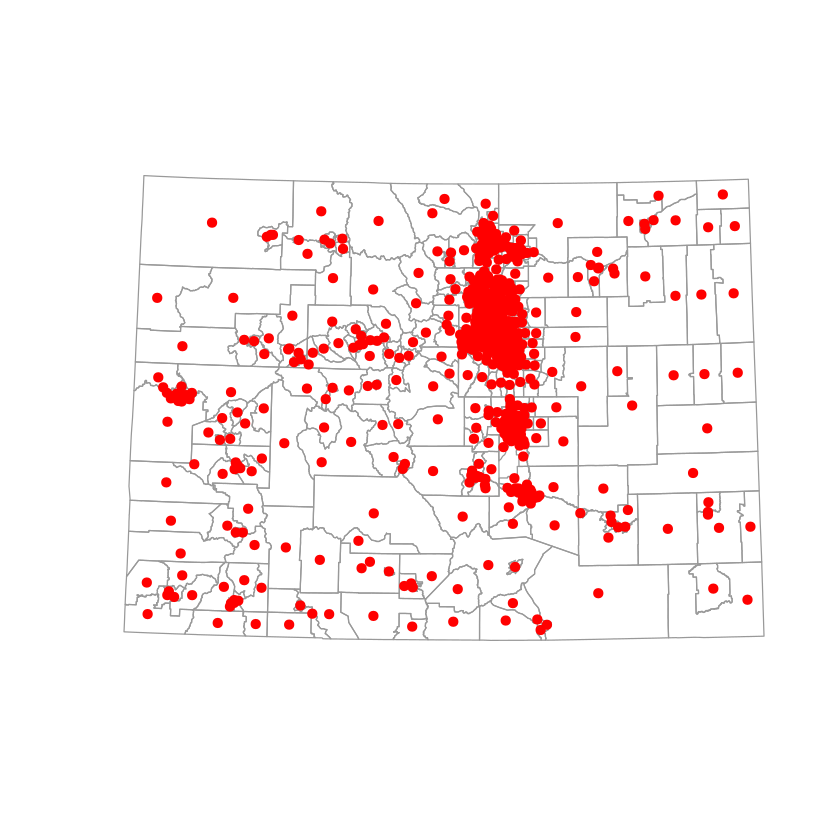

In [22]:
library(sf)
newshape <- sf::st_sf(diabetes_pop)
#make geography non-scalar
newshape <- st_transform(newshape, "+init=epsg:32613")
p2 <- st_point_on_surface(newshape)
newshape <- as.data.frame(newshape)
newshape$counts = (newshape$DIABETES_A/100000)*newshape$Population
p2 <- as.data.frame(p2)
newshape$centroids <- p2$geometry.x
library(tidyverse)
separated_coord <- newshape %>%
    mutate(latitude = unlist(map(newshape$centroids,1)),
           longitude = unlist(map(newshape$centroids,2)))
newshape2 <- sf::st_sf(separated_coord)
plot(newshape2$geometry.x, border="grey60")
points(newshape2$latitude, newshape2$longitude, col = 'red', pch = 19)

In [ ]:
Figure 2:
A map of region centroids (1 per census tract) superimposed on their respective Colorado census tract.

## <br><br><br><br><br> CEPP Method

In [4]:
suppressPackageStartupMessages(library(smerc))
suppressPackageStartupMessages(library(spdep))

In [11]:
sum(newshape2$Population)

[1] 5421688

In [5]:
coords = as.data.frame(cbind("x" = newshape2$latitude, "y" = newshape2$longitude)) 
cases = (newshape2$counts)
cepp16000 = cepp.test(coords = coords, 
                     cases = cases, 
                     pop = newshape2$Population, 
                     nstar = 16000, 
                     alpha = 0.01) 
 
cepp20000 = cepp.test(coords = coords, 
                     cases = cases, 
                     pop = newshape2$Population,  
                     nstar = 20000, 
                     alpha = 0.01) 
 
cepp30000 = cepp.test(coords = coords, 
                      cases = cases, 
                      pop = newshape2$Population,  
                      nstar = 30000, 
                      alpha = 0.01)

summary(cepp16000) 
summary(cepp20000) 
summary(cepp30000)




regions max_dist cases     ex    rr  stat   p    
1  4        2735.6  1229.9551 289.1 4.3 1145.5 0.002
2  6        3743.2   697.6113 238.8 2.9  666.8 0.002
3  4        1912.4   690.5314 279.6 2.5  606.5 0.002
4  7        3034.9   593.8787 234.2 2.5  579.2 0.002
5  3        2428.8   739.3422 312.8 2.4  554.7 0.002
6  4        2072.4   697.3180 275.3 2.5  541.9 0.002
7  6        3191.3   626.7623 281.9 2.2  538.9 0.002
8  4        2311.2   542.2478 231.4 2.4  538.2 0.002
9  3        2822.8   547.2231 232.6 2.4  535.3 0.002
10 5        2412.8   797.3255 319.5 2.5  532.7 0.002
11 5        4011.1   657.4847 291.5 2.3  527.7 0.002
12 6        3490.0   661.9427 290.5 2.3  521.8 0.002
13 4        2444.8   660.1315 318.4 2.1  501.6 0.002
14 3        2903.5   495.4728 229.7 2.2  492.6 0.002
15 3        2021.2   520.2221 249.2 2.1  475.0 0.002
16 3        3276.0   482.2627 237.2 2.0  465.3 0.002
17 4        1872.0   623.6138 334.4 1.9  455.1 0.002
18 6        1739.4   474.7096 239.9 2.0  448.9 0.002
19 4        3243.9   520.6775 276.5 1.9  445.0 0.002
20 4        2055.5   479.7309 262.3 1.8  444.4 0.002
21 3        1902.1   467.8416 239.1 2.0  444.4 0.002
22 5        2851.2   549.7891 284.2 1.9  432.0 0.002
23 5        2760.0   422.2796 245.5 1.7  408.8 0.002
24 3        2253.8   437.2424 245.6 1.8  407.5 0.002
25 4        5047.4   445.5271 271.7 1.6  388.0 0.002
26 3        2108.5   392.5856 231.1 1.7  386.0 0.002
27 5        2422.2   411.4302 249.4 1.7  385.7 0.002
28 7        4194.3   394.6120 257.0 1.5  377.9 0.002
29 5        2721.0   427.5155 260.3 1.6  373.7 0.002
30 4       81832.7   420.3361 253.3 1.7  370.5 0.002
⋮  ⋮       ⋮        ⋮         ⋮     ⋮   ⋮      ⋮    
32 4        3214.8  391.7759  263.9 1.5 362.3  0.002
33 5       10543.3  378.6802  247.0 1.5 346.8  0.002
34 5       22215.6  425.2586  294.5 1.4 343.0  0.002
35 5        3787.3  407.4185  279.0 1.5 339.0  0.002
36 6        4313.4  355.8346  235.3 1.5 337.0  0.002
37 5        3454.0  348.1446  241.8 1.4 336.8  0.002
38 4        3313.2  359.7202  240.1 1.5 336.2  0.002
39 7       93991.5  348.8369  247.2 1.4 336.1  0.002
40 6        2919.4  369.0212  254.3 1.5 334.0  0.002
41 4        3102.2  352.1787  236.8 1.5 332.6  0.002
42 4        6763.1  434.7564  296.5 1.5 331.5  0.002
43 4        2381.7  354.5287  244.5 1.5 331.3  0.002
44 5        5888.9  430.8720  304.7 1.4 330.1  0.002
45 3        2951.8  381.2639  280.7 1.4 326.5  0.002
46 4        2316.1  375.9034  287.4 1.3 323.3  0.002
47 3        2953.7  380.6331  274.9 1.4 318.4  0.002
48 3        3536.5  400.0331  288.0 1.4 316.4  0.002
49 2       12635.4  417.2030  306.2 1.4 316.2  0.002
50 4        2325.6  324.8728  240.2 1.4 315.1  0.002
51 5        2285.1  449.3055  316.5 1.4 312.8  0.002
52 4        2320.7  316.3224  231.2 1.4 310.8  0.002
53 4        2417.7  341.2163  257.5 1.3 308.1  0.002
54 7        2985.6  331.1071  247.0 1.3 307.7  0.002
55 5       59490.1  307.3874  230.7 1.3 304.7  0.002
56 4        2697.7  369.7493  281.8 1.3 303.9  0.002
57 4        2854.7  368.9705  281.4 1.3 300.7  0.002
58 4        3973.8  320.5189  267.3 1.2 300.5  0.002
59 5        2086.4  300.3106  230.7 1.3 297.5  0.004
60 6        3968.5  382.4067  299.0 1.3 295.6  0.004
61 4        2665.9  334.2901  265.4 1.3 295.1  0.006

regions max_dist cases     ex    rr  stat   p    
1  4         2735.6 1229.9551 289.1 4.3 1224.3 0.002
2  8         3831.5  848.3537 319.3 2.7  783.0 0.002
3  5         2465.9  848.2700 357.1 2.4  769.9 0.002
4  5         2210.4  844.1542 340.8 2.5  719.0 0.002
5  8         3753.5  705.0173 287.5 2.5  697.9 0.002
6  3         2428.8  739.3422 312.8 2.4  678.8 0.002
7  6         3294.8  755.5452 339.1 2.2  660.9 0.002
8  5         4033.5  739.9248 318.2 2.3  650.7 0.002
9  5         4011.1  657.4847 291.5 2.3  644.1 0.002
10 4         3403.8  648.9518 305.0 2.1  620.8 0.002
11 5         2921.9  690.9581 332.8 2.1  605.1 0.002
12 5         2382.8  617.5458 300.0 2.1  592.9 0.002
13 4         3646.8  618.0520 302.0 2.1  582.4 0.002
14 4         3173.2  582.3745 289.5 2.0  571.8 0.002
15 4         3007.2  592.9516 306.1 1.9  565.9 0.002
16 4         1872.0  623.6138 334.4 1.9  545.3 0.002
17 7         2021.3  594.4156 322.5 1.8  540.1 0.002
18 4         3389.3  643.9959 347.2 1.9  536.7 0.002
19 5         2259.5  591.9444 319.6 1.9  530.1 0.002
20 5         2684.3  539.4934 324.1 1.7  517.5 0.002
21 5         3443.9  607.4888 354.4 1.7  498.9 0.002
22 9         4949.0  582.9993 315.5 1.9  494.7 0.002
23 4         3249.5  505.6211 300.7 1.7  471.3 0.002
24 5         2911.6  471.9508 287.6 1.6  467.0 0.002
25 6         2422.2  491.8413 312.2 1.6  457.0 0.002
26 5         2340.3  477.1452 299.7 1.6  455.8 0.002
27 5         3224.8  520.4498 319.7 1.6  446.5 0.002
28 6        84436.6  454.1219 295.3 1.5  443.5 0.002
29 7         5828.8  441.9319 286.3 1.5  438.4 0.002
30 4         3057.7  439.0419 285.6 1.5  438.0 0.002
31 5         3310.8  513.6339 328.9 1.6  436.7 0.002
32 7         3952.1  473.9508 323.9 1.5  431.5 0.002
33 4         2539.6  449.8498 309.0 1.5  423.9 0.002
34 9        14892.7  450.3741 305.2 1.5  421.8 0.002
35 8        74111.6  471.2182 328.8 1.4  418.3 0.002
36 4         6763.1  434.7564 296.5 1.5  417.4 0.002
37 5        22215.6  425.2586 294.5 1.4  413.5 0.002
38 5         3177.9  426.5053 296.7 1.4  407.8 0.002
39 5         5888.9  430.8720 304.7 1.4  404.9 0.002
40 4         2774.7  415.9809 297.1 1.4  396.6 0.002
41 3         3536.5  400.0331 288.0 1.4  395.8 0.002
42 6         3852.8  430.0029 315.4 1.4  393.5 0.002
43 2        12635.4  417.2030 306.2 1.4  389.8 0.002
44 4         2951.8  447.5291 353.2 1.3  385.2 0.002
45 5         2447.9  386.7040 286.4 1.4  384.7 0.002
46 4         2198.6  464.3195 346.1 1.3  383.5 0.002
47 5         2840.4  414.1140 317.5 1.3  379.5 0.002
48 7         3713.8  438.5818 334.5 1.3  374.7 0.002
49 4         2316.1  375.9034 287.4 1.3  373.8 0.002
50 5         3266.4  462.6941 371.5 1.2  370.9 0.002
51 8       110559.8  374.7223 294.2 1.3  369.6 0.002
52 8         4129.9  417.6800 332.0 1.3  366.6 0.004
53 6         3968.5  382.4067 299.0 1.3  365.3 0.004
54 5         3471.8  392.7202 324.2 1.2  362.4 0.004
55 7         3749.6  368.8383 297.0 1.2  359.0 0.008

regions max_dist cases     ex    rr  stat   p    
1   6        3044.0 1450.2761 460.3 3.2 1419.2 0.002
2  11        6302.8 1124.6166 441.8 2.6 1090.8 0.002
3   7        2924.8 1184.3076 506.5 2.4 1055.6 0.002
4   7        2790.5 1178.4698 510.3 2.3 1022.3 0.002
5   5        3326.6  984.7934 439.9 2.3  948.2 0.002
6   7        5214.4  998.1716 469.6 2.1  931.5 0.002
7   9        4050.8  977.2895 458.8 2.1  922.6 0.002
8   9        4053.5  918.4679 444.5 2.1  890.6 0.002
9   6        5842.8  926.5133 454.5 2.1  888.6 0.002
10  9        4620.6  881.3561 429.8 2.1  877.2 0.002
11  8        4540.0  863.7767 450.4 1.9  863.8 0.002
12  7        3265.0  957.1147 474.5 2.0  843.7 0.002
13  7        4257.6  864.2772 444.1 2.0  835.1 0.002
14  6        4497.4  823.0188 429.5 1.9  819.5 0.002
15  6        3246.4  809.6100 438.3 1.9  777.4 0.002
16  7        3691.1  853.0495 488.2 1.8  758.4 0.002
17 10        8519.5  734.6844 431.3 1.7  724.7 0.002
18  9        2544.6  737.1193 455.4 1.6  711.8 0.002
19  7        3748.7  855.4391 517.4 1.7  711.5 0.002
20  8        3685.7  788.7478 478.6 1.7  710.3 0.002
21  6        4890.0  721.4020 440.0 1.6  699.6 0.002
22 12      132308.2  702.4754 459.4 1.5  653.7 0.002
23  9        3808.1  677.2499 495.4 1.4  629.4 0.002
24 11        6945.6  625.4499 428.7 1.5  624.2 0.002
25 10        4582.4  662.2969 467.7 1.4  604.2 0.002
26  7        4561.8  672.4084 549.5 1.2  598.1 0.002
27  7        6116.0  594.7592 429.4 1.4  592.0 0.002
28  7        3319.9  640.7202 473.4 1.4  588.7 0.002
29  8        3966.1  652.8734 462.9 1.4  586.4 0.002
30 12       16608.5  582.3321 436.5 1.3  576.0 0.002
31  6        3455.0  567.4928 429.8 1.3  565.5 0.002
32  3       12917.9  583.2886 443.2 1.3  564.2 0.002
33  5        3463.0  616.9326 484.3 1.3  563.0 0.002
34  8        4008.5  629.7908 462.4 1.4  557.1 0.002
35  9       62019.6  598.1459 471.7 1.3  546.5 0.002
36  4        5182.8  575.4235 452.7 1.3  543.2 0.002
37  7        3536.2  577.0743 458.7 1.3  540.0 0.002
38  7        3780.2  563.4473 459.4 1.2  535.0 0.002
39  7        3919.6  572.6180 486.4 1.2  531.1 0.002
40  5        8518.5  539.7207 441.4 1.2  526.4 0.002
41 10        5712.7  574.8890 523.0 1.1  523.6 0.006

regions max_dist cases    ex      rr  stat    p    
1 217      26768.7 21755.55 14335.3 1.7 21641.2 0.002
2 231     381433.9 15979.10 14321.2 1.1 15938.0 0.002

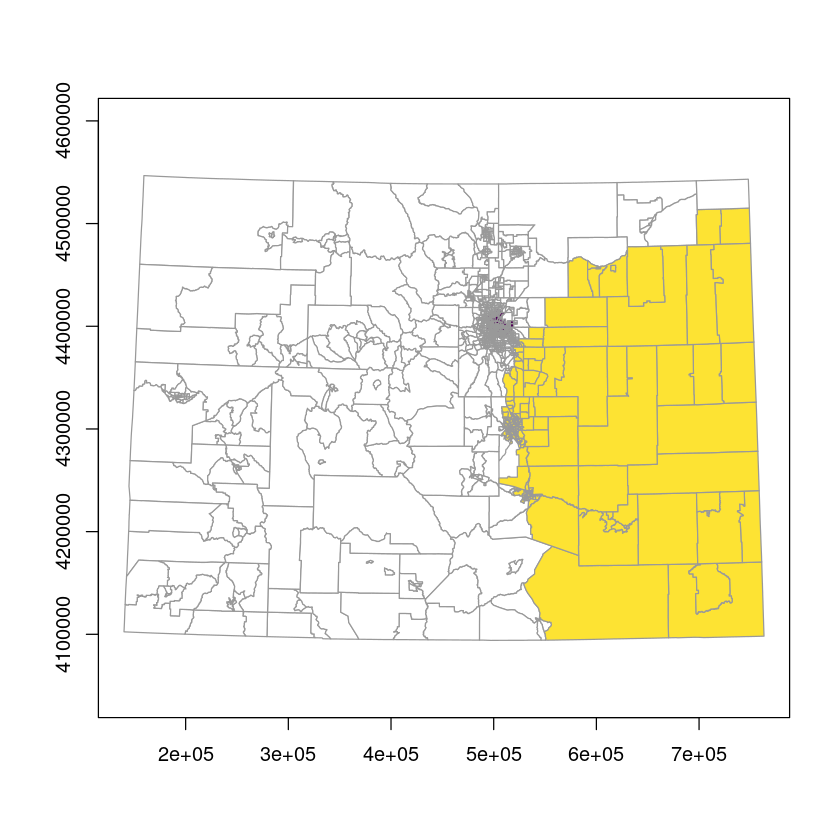

In [14]:
cepp1000000 = cepp.test(coords = coords, 
                      cases = cases, 
                      pop = newshape2$Population,  
                      nstar = 1000000, 
                      alpha = 0.01)
summary(cepp1000000)

plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp1000000))
plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp1000000), xlim = range(450000:600000), ylim = c(4350000, 4500000))

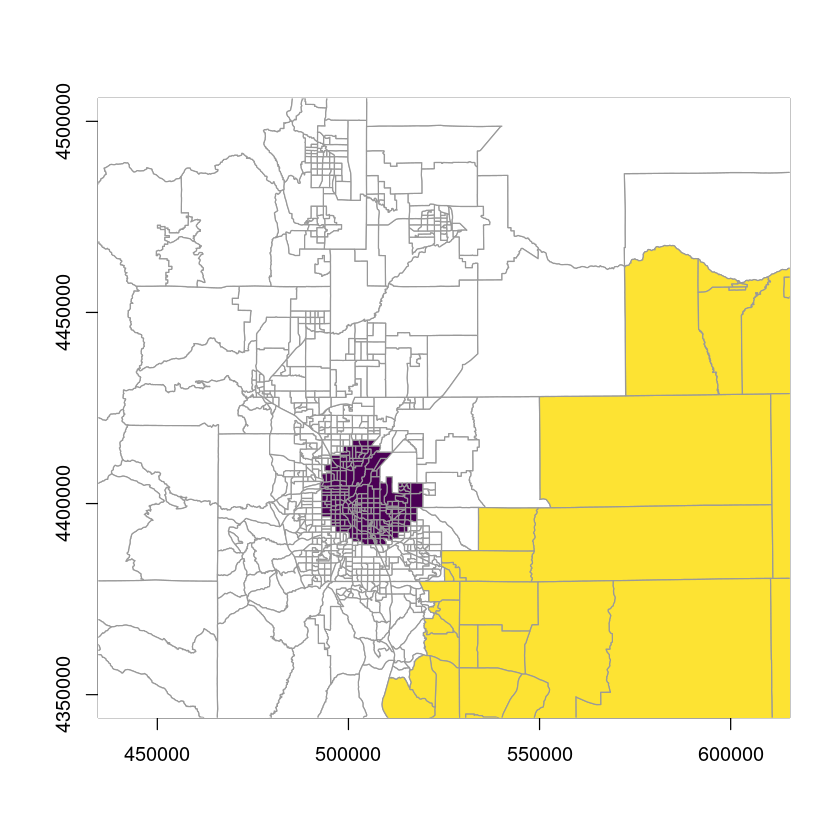

In [15]:
plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp1000000), xlim = range(450000:600000), ylim = c(4350000, 4500000))

In [ ]:
cepp.05 = cepp.test(coords = coords, 
                      cases = cases, 
                      pop = newshape2$Population,  
                      nstar = .05*sum(newshape2$Population), 
                      alpha = 0.01)
summary(cepp.05)

plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp.05))
plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp.05), xlim = range(450000:600000), ylim = c(4350000, 4500000))

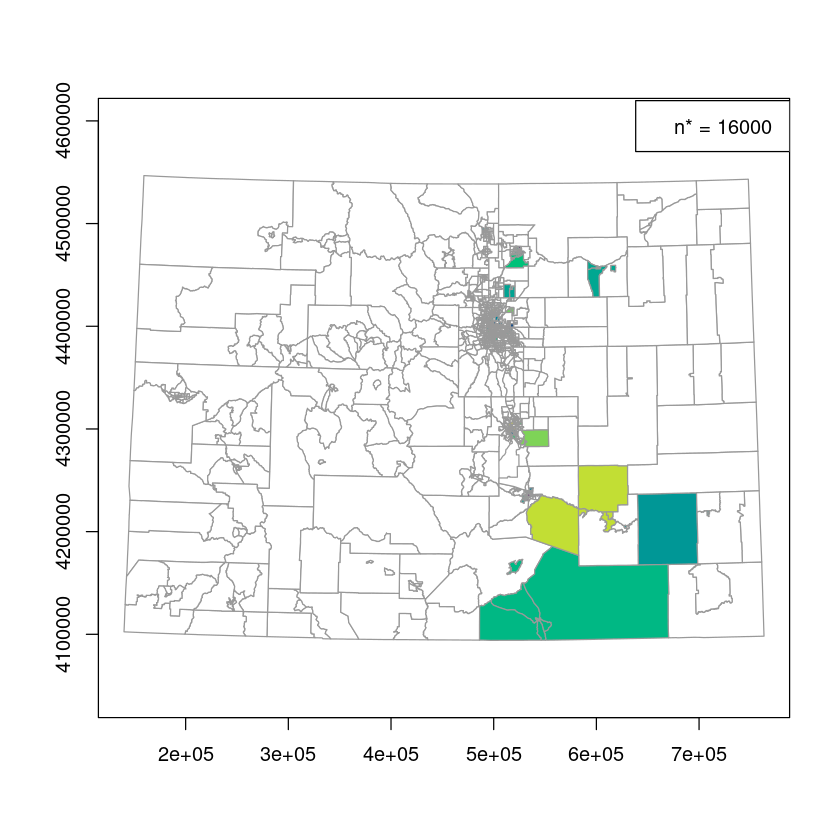

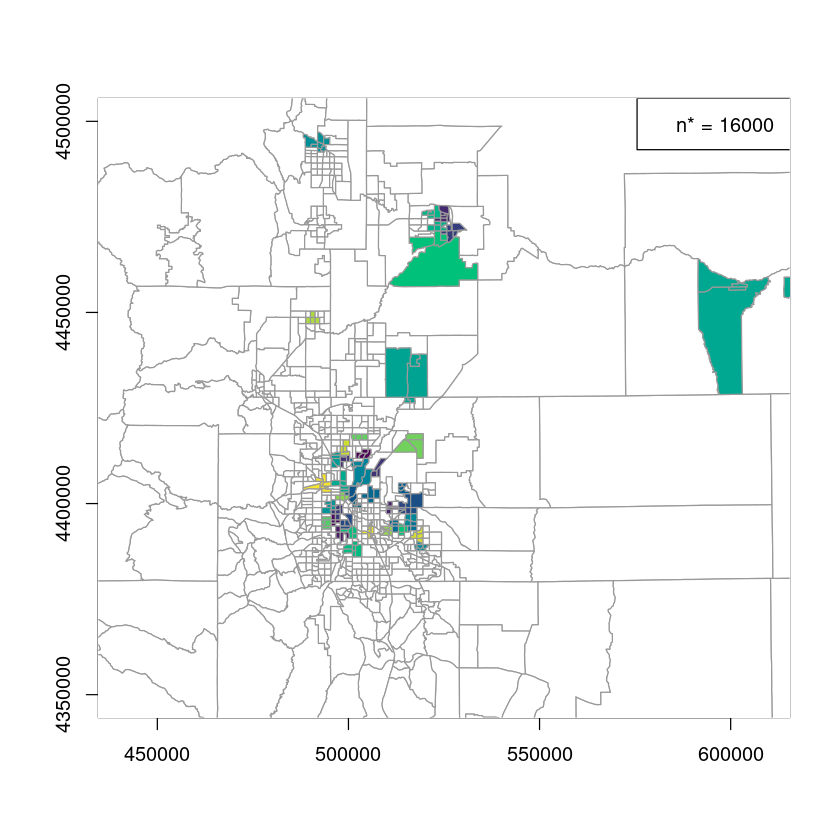

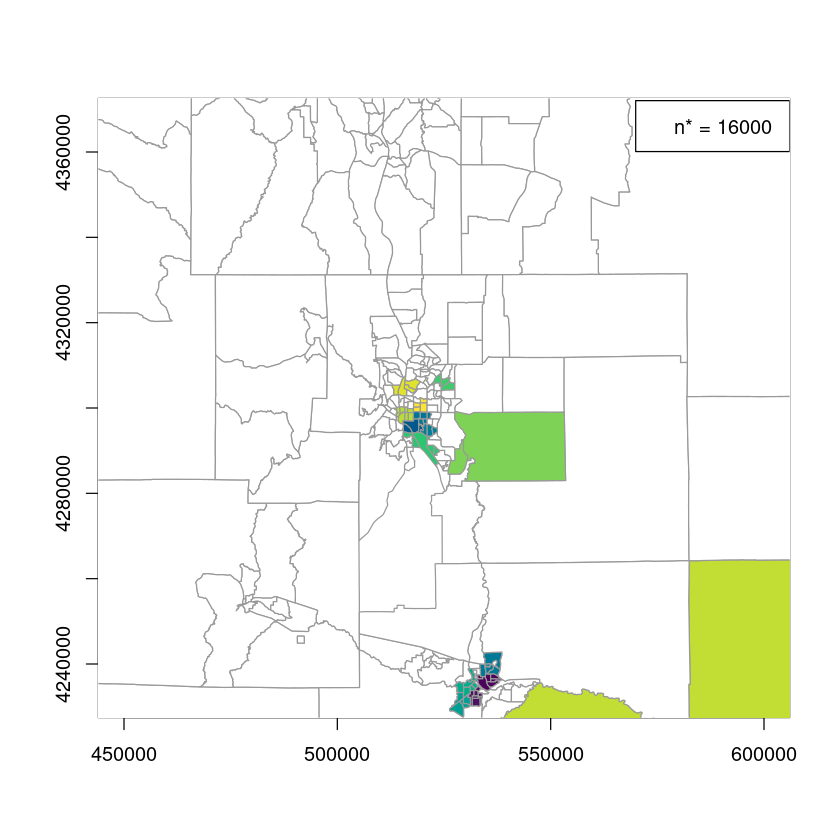

In [6]:
plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp16000)) 
legend("topright", legend = c("n* = 16000")) 
plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp16000), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
legend("topright", legend = c("n* = 16000")) 
plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp16000), xlim = range(450000:600000), ylim = c(4250000, 4350000)) 
legend("topright", legend = c("n* = 16000")) 

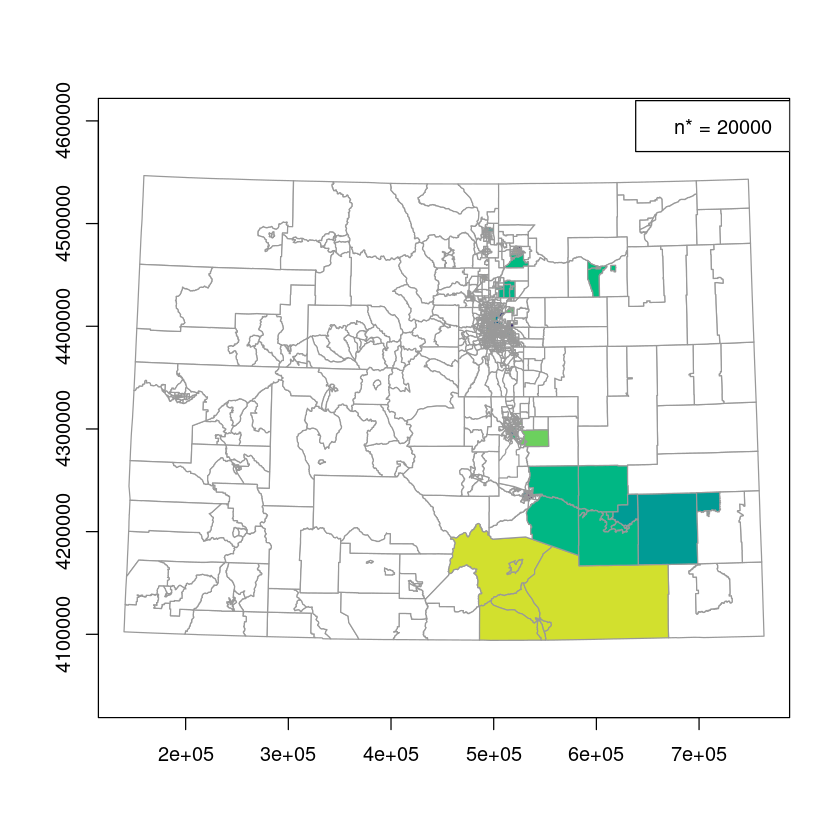

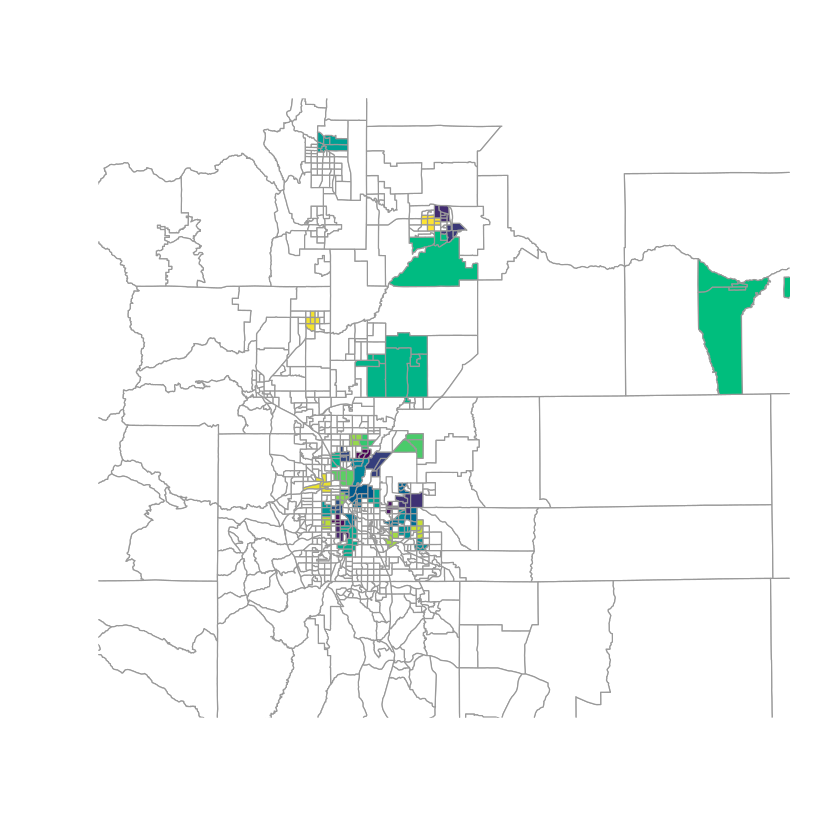

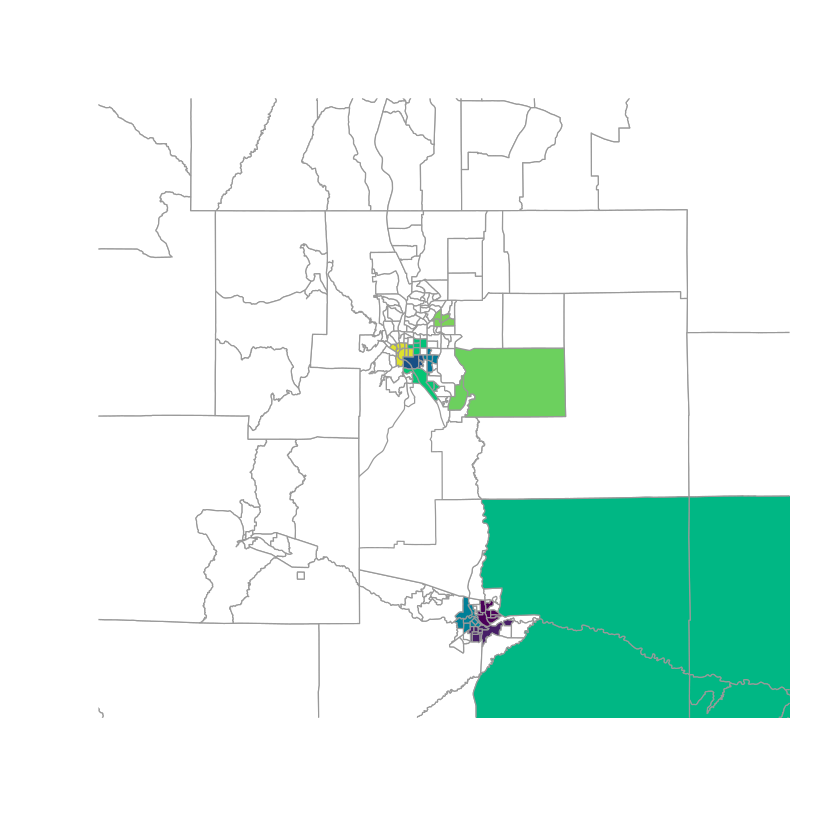

In [108]:
plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp20000)) 
legend("topright", legend = c("n* = 20000")) 
plot(newshape2$geometry.x, border = "grey60", 
     col = color.clusters(cepp20000), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
plot(newshape2$geometry.x, border = "grey60", 
     col = color.clusters(cepp20000), xlim = range(450000:600000), ylim = c(4250000, 4320000)) 

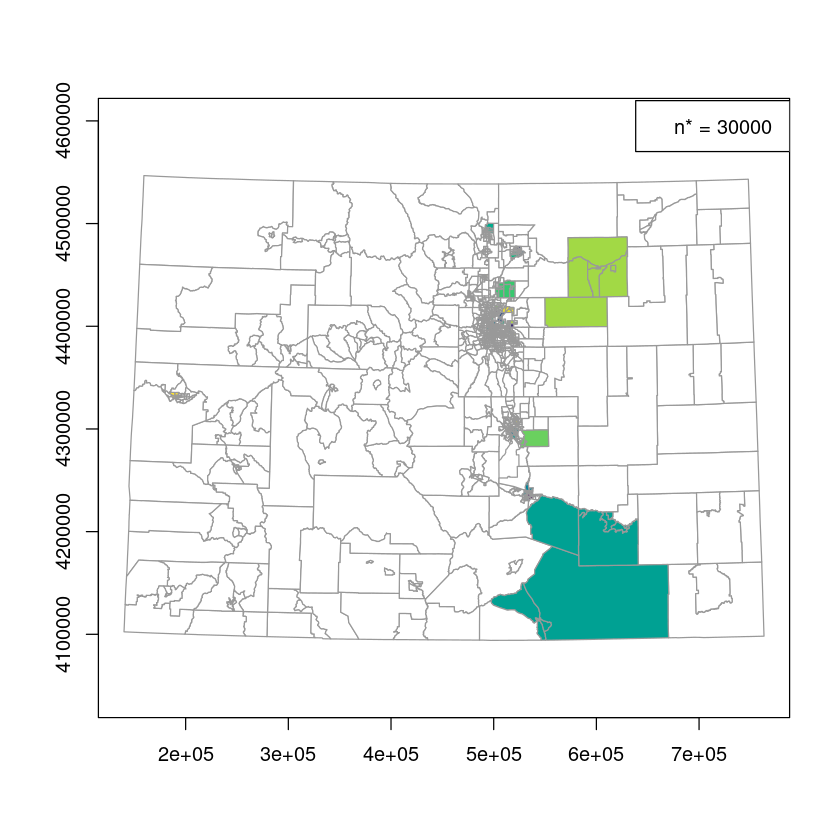

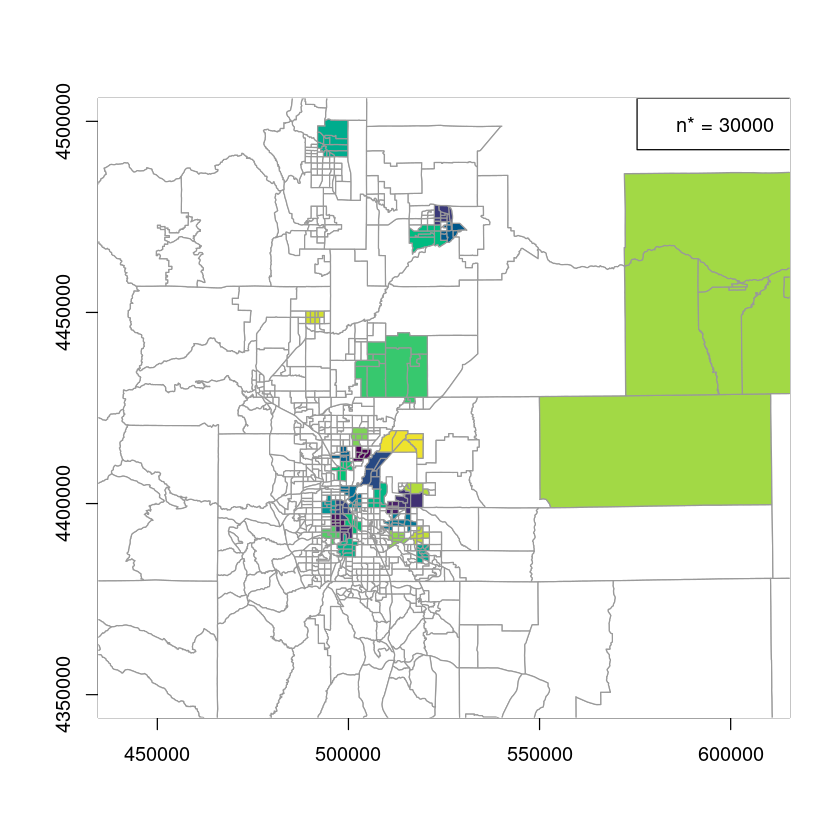

In [7]:
plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp30000)) 
legend("topright", legend = c("n* = 30000"))
plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp30000), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
legend("topright", legend = c("n* = 30000")) 

## <br><br><br><br><br> Besag-Newell Method

In [5]:
newshape3 <- as.data.frame(newshape2)
summary(newshape3$counts)
summary(newshape3$Population)
#on hw assignment, case number was decided with approximate mean, mean + 1/3(max-mean), mean + 2/3(max-mean)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   29.01   49.93   62.40   82.50  667.67 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     97    2980    4158    4379    5496   15869 

In [8]:
coords = as.data.frame(cbind("x" = newshape2$latitude, "y" = newshape2$longitude)) 
cases = (newshape2$counts)
bn650 = bn.test(coords = coords, 
              cases = cases, 
              pop = newshape2$Population, 
              cstar = 650, 
              alpha = 0.01) 
bn650 # simple info 
summary(bn650) # cluster info 
 
 
bn1000 = bn.test(coords = coords, 
               cases = cases, 
               pop = newshape2$Population, 
               cstar = 1000, 
               alpha = 0.01) 
bn1000 
summary(bn1000) 
 
 
bn1350 = bn.test(coords = coords, 
               cases = cases, 
               pop =newshape2$Population, 
               cstar = 1350, 
               alpha = 0.01) 
bn1350 
summary(bn1350)

method: Besag-Newell

case radius: 650

modified p-value: FALSE



regions max_dist cases    ex    rr  stat p            
1   1           0.0 667.6729  69.7 9.7  1    0.000000e+00
2   6        3743.2 697.6113 238.8 2.9  6   1.948475e-106
3   4        2316.6 664.7983 258.7 2.6  4    2.027046e-92
4   4        2072.4 697.3180 275.3 2.5  4    4.495450e-82
5   4        2000.8 763.8596 279.5 2.8  4    1.192829e-79
6   5        3294.8 656.9627 282.7 2.3  5    8.396660e-78
7   7        3346.4 672.9785 286.9 2.4  7    1.828872e-75
8   6        3490.0 661.9427 290.5 2.3  6    1.624198e-73
9   5        4011.1 657.4847 291.5 2.3  5    5.982400e-73
10  3        2428.8 739.3422 312.8 2.4  3    2.802645e-62
11  4        2444.8 660.1315 318.4 2.1  4    1.044633e-59
12  5        3078.3 671.7511 327.8 2.1  5    1.547005e-55
13  7        2961.0 658.3438 335.4 2.0  7    2.295234e-52
14  5        2992.5 685.0581 343.9 2.0  5    5.325798e-49
15  5        4848.6 693.4696 349.7 2.0  5    9.091848e-47
16  5        5629.9 725.6937 360.8 2.0  5    9.439647e-43
17  5        2042.1 707.8990 362.3 2.0  5    3.201976e-42
18  6        2897.5 707.4951 382.1 1.9  6    8.898873e-36
19  4        1685.4 657.7039 385.7 1.7  4    1.065304e-34
20  7        3224.8 663.4263 396.9 1.7  7    1.814722e-31
21  9        8233.6 660.2463 402.5 1.6  9    6.413637e-30
22  6        3170.8 655.5238 407.7 1.6  6    1.468050e-28
23  5        3406.3 673.9927 429.9 1.6  5    3.504944e-23
24 10      106241.7 689.2014 459.1 1.5 10    2.976087e-17
25 10        4582.4 662.2969 467.7 1.4 10    9.849241e-16
26  7        3665.2 657.8487 470.2 1.4  7    2.687683e-15
27  8        3235.1 668.7932 471.6 1.4  8    4.555030e-15
28  9        5333.7 671.8373 477.8 1.4  9    4.577181e-14
29 12        6939.5 667.3852 478.1 1.4 12    5.268383e-14
30  9        3499.7 655.6005 481.3 1.4  9    1.640036e-13
31  9        6637.6 651.9540 500.8 1.3  9    1.031487e-10
32  5        5906.7 838.7917 501.4 1.7  5    1.215744e-10
33  9        4429.0 653.1310 503.2 1.3  9    2.112217e-10
34  6        4319.9 670.4700 530.5 1.3  6    2.946929e-07
35  6        5458.7 652.7502 530.7 1.2  6    3.076755e-07
36  9        4132.3 677.1080 533.0 1.3  9    5.180674e-07
37 13       16951.2 718.1132 533.7 1.3 13    6.069045e-07
38  5       25866.4 667.2499 540.1 1.2  5    2.446723e-06
39  7        4561.8 672.4084 549.5 1.2  7    1.642549e-05
40  9        4338.7 652.2552 549.8 1.2  9    1.734741e-05
41 11       91990.9 671.7700 554.3 1.2 11    4.062545e-05
42  8        6020.2 705.8843 561.1 1.3  8    1.322827e-04
43 13      123631.2 656.8192 572.2 1.1 13    7.691634e-04
44  8        3311.9 661.4308 580.1 1.1  8    2.293311e-03
45  9        4984.6 680.6188 580.3 1.2  9    2.376903e-03

method: Besag-Newell

case radius: 1000

modified p-value: FALSE



regions max_dist cases    ex    rr  stat p            
1   3        2102.1 1112.521 204.1 5.5  3    0.000000e+00
2   9        5517.1 1025.931 394.7 2.6  9   2.695876e-143
3   6        2465.9 1039.230 417.4 2.5  6   8.471754e-129
4   6        2483.0 1006.293 419.0 2.4  6   7.084141e-128
5   7        5842.8 1016.280 495.6 2.1  7    3.707759e-88
6   5        3234.7 1017.303 500.0 2.0  5    3.270930e-86
7  10        4050.8 1015.484 505.2 2.0 10    5.763548e-84
8  10        4301.5 1024.080 506.5 2.0 10    1.994474e-83
9   7        5143.8 1070.851 506.8 2.1  7    2.670815e-83
10  8        3475.5 1037.068 539.6 1.9  8    2.948720e-70
11  9        3120.3 1009.137 541.1 1.9  9    1.056066e-69
12  8        3975.2 1012.124 544.9 1.9  8    2.554614e-68
13  9        6193.1 1042.907 544.9 1.9  9    2.554614e-68
14 12        5227.1 1070.395 548.8 2.0 12    6.320495e-67
15  9        3277.3 1003.170 591.9 1.7  9    9.182074e-53
16  9        3908.3 1019.475 649.4 1.6  9    2.159081e-37
17  7        4406.2 1008.270 652.0 1.6  7    8.749633e-37
18 12        5748.3 1006.678 660.8 1.5 12    8.945403e-35
19 18      166806.0 1040.438 743.8 1.4 18    2.547820e-19
20 14        4508.5 1032.696 775.8 1.3 14    7.328829e-15
21 11        9340.3 1014.277 785.0 1.3 11    9.972642e-14
22 10        5480.8 1063.602 792.1 1.3 10    6.962778e-13
23 17       20187.9 1048.033 795.1 1.3 17    1.560865e-12
24 11        5832.9 1037.182 799.0 1.3 11    4.264590e-12
25 10        4991.5 1037.833 800.2 1.3 10    5.831640e-12
26 17        6569.0 1021.588 819.7 1.2 17    6.236085e-10
27 18        8953.2 1030.292 831.6 1.2 18    8.229335e-09
28 12       26463.4 1002.668 839.7 1.2 12    4.174230e-08
29 14        5020.9 1001.206 848.1 1.2 14    2.079919e-07
30 14        6697.2 1039.919 872.6 1.2 14    1.321735e-05
31 18      166464.8 1009.979 886.4 1.1 18    9.713729e-05
32  8       57699.3 1035.930 889.5 1.2  8    1.456544e-04
33 10       31318.6 1008.452 891.9 1.1 10    2.010713e-04
34 20        7163.6 1042.201 893.7 1.2 20    2.531302e-04

method: Besag-Newell

case radius: 1350

modified p-value: FALSE



regions max_dist cases    ex     rr  stat p            
1   6        3254.9 1395.173  432.5 3.3  6   1.969781e-271
2  17        8045.9 1377.818  553.3 2.5 17   1.963986e-179
3   8        3546.2 1356.658  562.8 2.4  8   1.522747e-173
4   9        3323.4 1351.589  602.8 2.3  9   1.220012e-150
5   9        6229.2 1368.844  648.4 2.1  9   1.116933e-127
6   9        8257.1 1393.604  701.6 2.0  9   1.725643e-104
7   9        4305.1 1388.857  713.4 2.0  9   7.318961e-100
8  11        4470.9 1359.007  718.4 1.9 11    6.432188e-98
9  15        6131.8 1390.701  725.5 1.9 15    3.198084e-95
10 11        5447.9 1408.089  757.1 1.9 11    6.317778e-84
11 13        5142.1 1400.894  831.7 1.7 13    3.649927e-61
12 13        4529.2 1390.337  889.7 1.6 13    8.476135e-47
13 17        5523.2 1359.652  965.3 1.4 17    9.886868e-32
14 22       22462.0 1382.360  977.2 1.4 22    1.044252e-29
15 27      254716.2 1368.101 1008.9 1.4 27    1.033459e-24
16 17        5977.8 1366.543 1023.7 1.3 17    1.362471e-22
17 14       21547.2 1374.625 1140.5 1.2 14    8.789687e-10
18 13       12100.3 1390.866 1143.5 1.2 13    1.557322e-09
19 14        8171.8 1399.361 1187.4 1.2 14    2.045008e-06
20 25        8933.7 1395.452 1208.2 1.2 25    3.251865e-05
21 19       38091.8 1481.897 1230.5 1.2 19    4.140677e-04

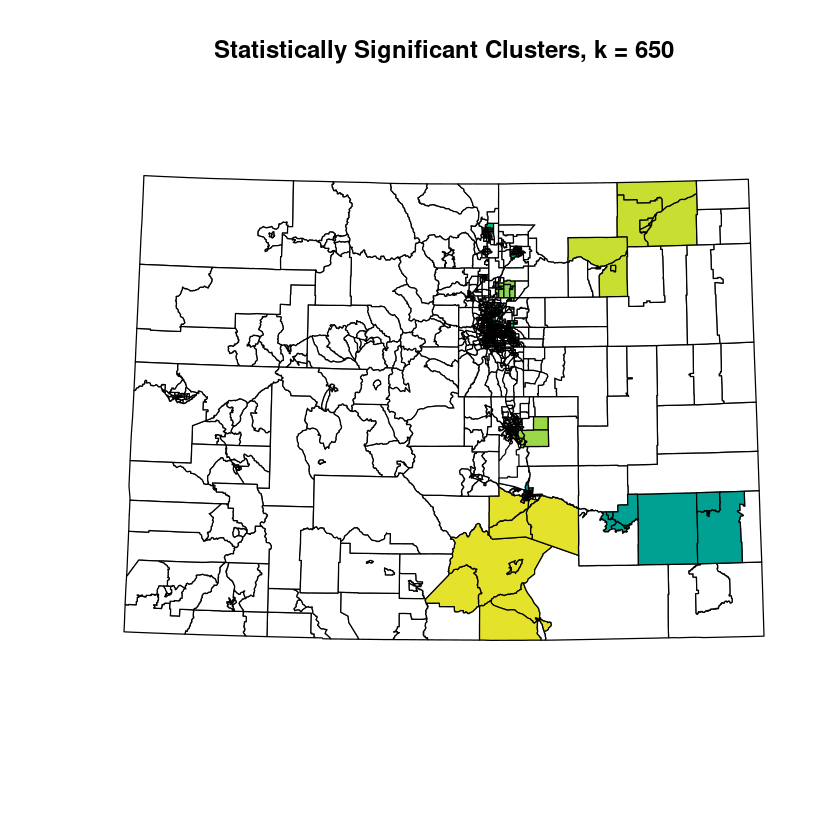

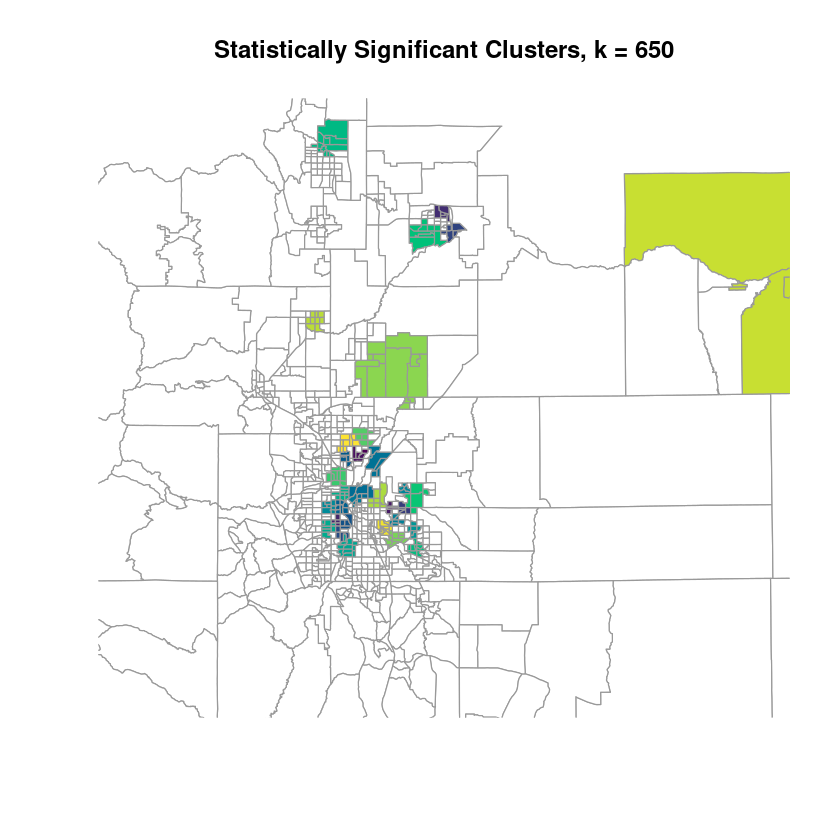

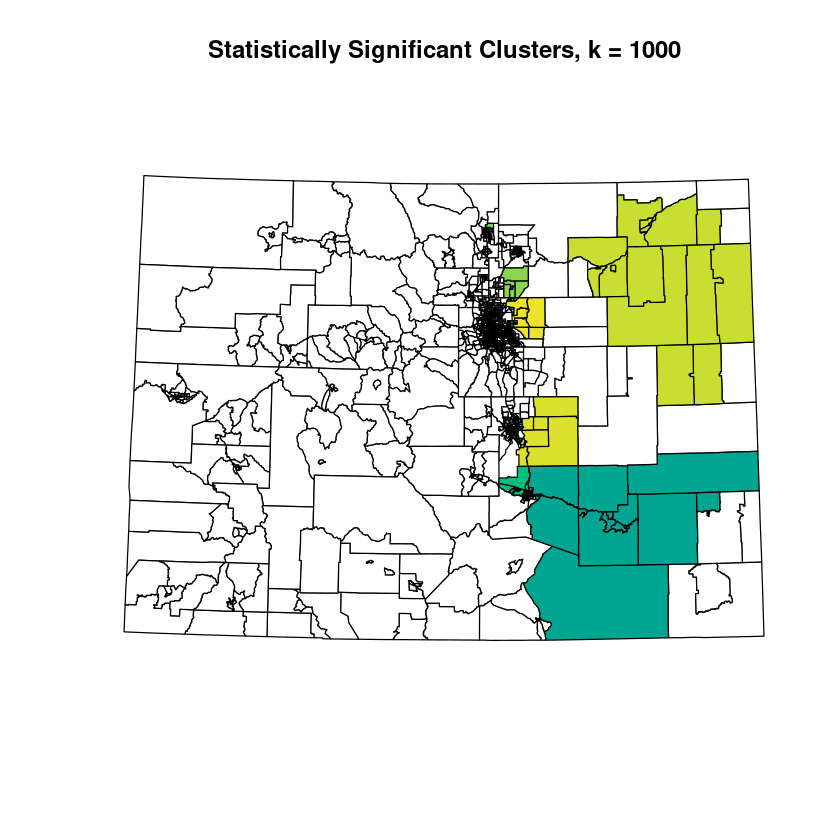

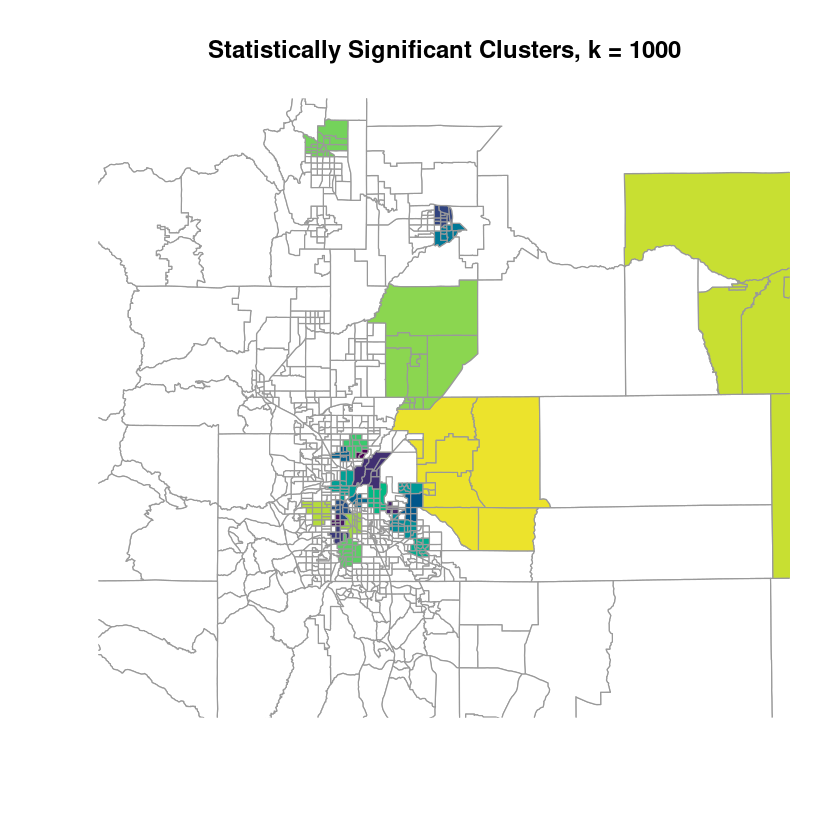

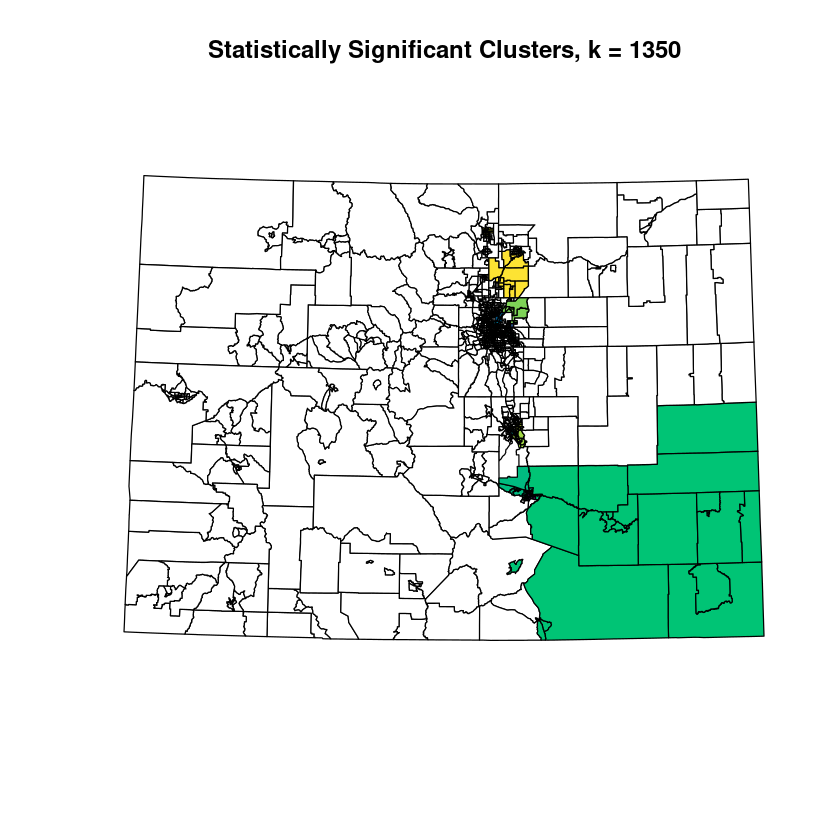

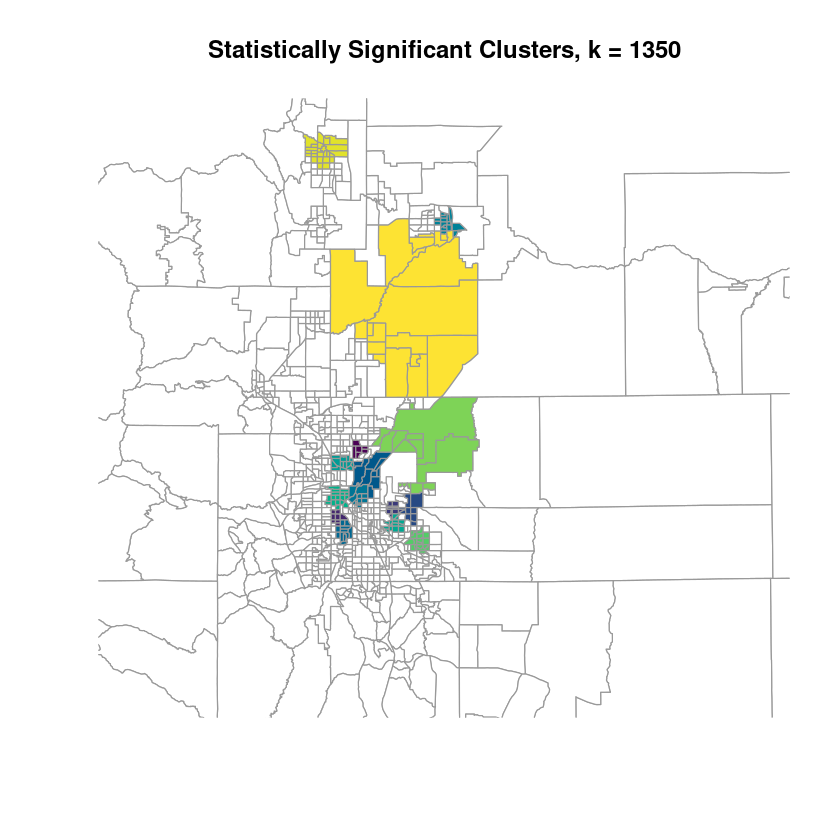

In [9]:
plot(newshape2$geometry.x, col = color.clusters(bn650)) 
title(main = "Statistically Significant Clusters, k = 650") 
plot(newshape2$geometry.x, border = "grey60",  
     col = color.clusters(bn650), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
title(main = "Statistically Significant Clusters, k = 650")
plot(newshape2$geometry.x, col = color.clusters(bn1000)) 
title(main = "Statistically Significant Clusters, k = 1000")
plot(newshape2$geometry.x, border = "grey60",  
     col = color.clusters(bn1000), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
title(main = "Statistically Significant Clusters, k = 1000")
plot(newshape2$geometry.x, col = color.clusters(bn1350)) 
title(main = "Statistically Significant Clusters, k = 1350") 
plot(newshape2$geometry.x, border = "grey60",  
     col = color.clusters(bn1350), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
title(main = "Statistically Significant Clusters, k = 1350")

 ## <br><br><br><br><br> Poisson Spatial Scan Statistic

In [77]:
coords = as.data.frame(cbind("x" = newshape2$latitude, "y" = newshape2$longitude)) 
cases = (newshape2$counts)
population = newshape2$Population
# expected number of cases 
e = sum(cases)/sum(population) * population 
# apply circular scan method 
scan_.5 = scan.test(coords = coords, 
                 cases = cases, 
                 pop = population, 
                 ex = e,  
                 ubpop = 0.5, 
                 nsim = 999, 
                 alpha  = 0.1) 
 
summary(scan_.5) 
 
# apply circular scan method 
scan_.1 = scan.test(coords = coords, 
                 cases = cases, 
                 pop = population, 
                 ex = e,  
                 ubpop = 0.1, 
                 nsim = 999, 
                 alpha  = 0.1) 
 
summary(scan_.1) 

computing statistics for simulated data:



regions max_dist cases       ex      rr  stat   p    
1  288      33565.9 27726.73387 19098.0 1.7 2382.5 0.001
2   32      10642.0  2794.51696  1302.8 2.2  655.6 0.001
3   23      10915.2  2339.81587  1237.1 1.9  396.5 0.001
4   26       9077.7  2792.87034  1682.6 1.7  313.2 0.001
5   14     152827.8   919.89216   623.9 1.5   61.7 0.001
6    3       2245.5   180.92966    76.8 2.4   51.0 0.001
7    6       4194.3   369.48730   213.3 1.7   47.0 0.001
8    1          0.0   215.51831   106.1 2.0   43.4 0.001
9    4      39264.3   245.35068   133.0 1.8   37.9 0.001
10   2       5422.6   195.00022   104.0 1.9   31.6 0.001
11   1          0.0   150.20550    73.8 2.0   30.4 0.001
12   3       1759.1   218.25020   128.7 1.7   25.8 0.001
13   5      22215.6   425.25857   294.5 1.4   25.6 0.001
14   3      12917.9   583.28864   443.2 1.3   20.3 0.001
15   2       1506.3   214.89460   138.6 1.6   18.0 0.001
16   3       3182.1   258.90411   176.4 1.5   16.9 0.001
17   4       2639.0   227.27202   154.3 1.5   15.1 0.001
18   6       2919.2   507.47680   396.5 1.3   14.3 0.001
19   3       2621.4   272.51777   197.8 1.4   12.6 0.004
20   3       2292.7   176.97391   120.0 1.5   11.8 0.009
21   3       2401.1   259.24356   192.4 1.3   10.5 0.034
22   1          0.0   168.35727   116.1 1.5   10.3 0.040
23   1          0.0   152.23464   103.1 1.5   10.2 0.042
24   1          0.0    97.92057    59.9 1.6   10.1 0.049
25   5      22680.9   453.04838   367.0 1.2    9.4 0.076
26   1          0.0    87.90769    53.2 1.7    9.4 0.079

computing statistics for simulated data:



regions max_dist cases       ex     rr  stat   p    
1  95       22003.8 11388.41996 6852.7 1.8 1398.5 0.001
2  33        8407.4  4626.62342 2340.0 2.0  902.5 0.001
3  32       10642.0  2794.51696 1302.8 2.2  655.6 0.001
4  24        6637.2  2847.51201 1567.5 1.8  430.7 0.001
5  23       10915.2  2339.81587 1237.1 1.9  396.5 0.001
6  26        9077.7  2792.87034 1682.6 1.7  313.2 0.001
7   1           0.0   173.70551   54.8 3.2   81.6 0.001
8  14      152827.8   919.89216  623.9 1.5   61.7 0.001
9  21        6625.3  1654.18798 1260.1 1.3   57.1 0.001
10  1           0.0   183.95242   76.3 2.4   54.3 0.001
11  3        2245.5   180.92966   76.8 2.4   51.0 0.001
12  6        4194.3   369.48730  213.3 1.7   47.0 0.001
13  1           0.0   215.51831  106.1 2.0   43.4 0.001
14  4        2127.8   363.77063  215.7 1.7   42.2 0.001
15 10        4631.9   713.91645  496.5 1.4   42.2 0.001
16  4       39264.3   245.35068  133.0 1.8   37.9 0.001
17  3        1953.4   279.17592  166.1 1.7   32.0 0.001
18  2        5422.6   195.00022  104.0 1.9   31.6 0.001
19  1           0.0   150.20550   73.8 2.0   30.4 0.001
20  1           0.0   106.81466   47.2 2.3   27.6 0.001
21  5       22215.6   425.25857  294.5 1.4   25.6 0.001
22  1           0.0   165.66327   96.1 1.7   20.7 0.001
23  3       12917.9   583.28864  443.2 1.3   20.3 0.001
24  1           0.0   164.74217   98.3 1.7   18.7 0.001
25  1           0.0   125.31333   68.9 1.8   18.6 0.001
26  2        1506.3   214.89460  138.6 1.6   18.0 0.001
27  1           0.0    80.49281   38.7 2.1   17.2 0.001
28  4        2639.0   227.27202  154.3 1.5   15.1 0.001
29  6        2919.2   507.47680  396.5 1.3   14.3 0.001
30  1           0.0    97.64039   54.4 1.8   13.9 0.001
31  1           0.0   155.19946  100.6 1.5   12.7 0.007
32  3        2621.4   272.51777  197.8 1.4   12.6 0.007
33  3        1115.1   230.91324  164.5 1.4   11.9 0.014
34  3        2292.7   176.97391  120.0 1.5   11.8 0.015
35  1           0.0   105.82865   64.1 1.7   11.4 0.020
36  6        3968.5   382.40666  299.0 1.3   10.7 0.030
37  1           0.0   168.35727  116.1 1.5   10.3 0.043
38  1           0.0   190.76706  135.2 1.4   10.2 0.047
39  1           0.0    97.92057   59.9 1.6   10.1 0.050
40  5       22680.9   453.04838  367.0 1.2    9.4 0.076
41  1           0.0    87.90769   53.2 1.7    9.4 0.080

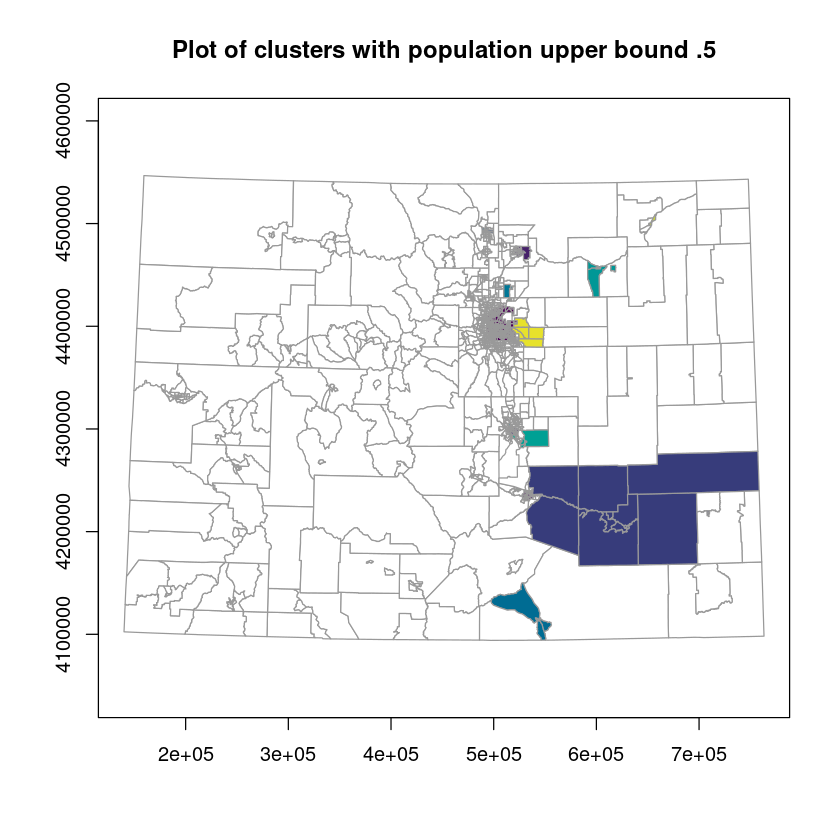

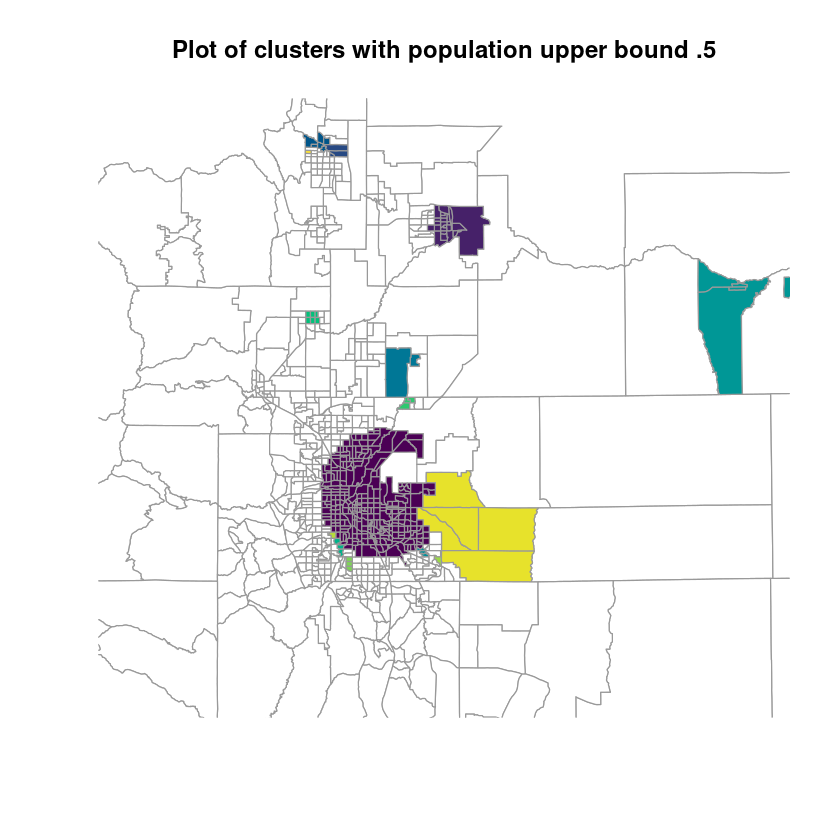

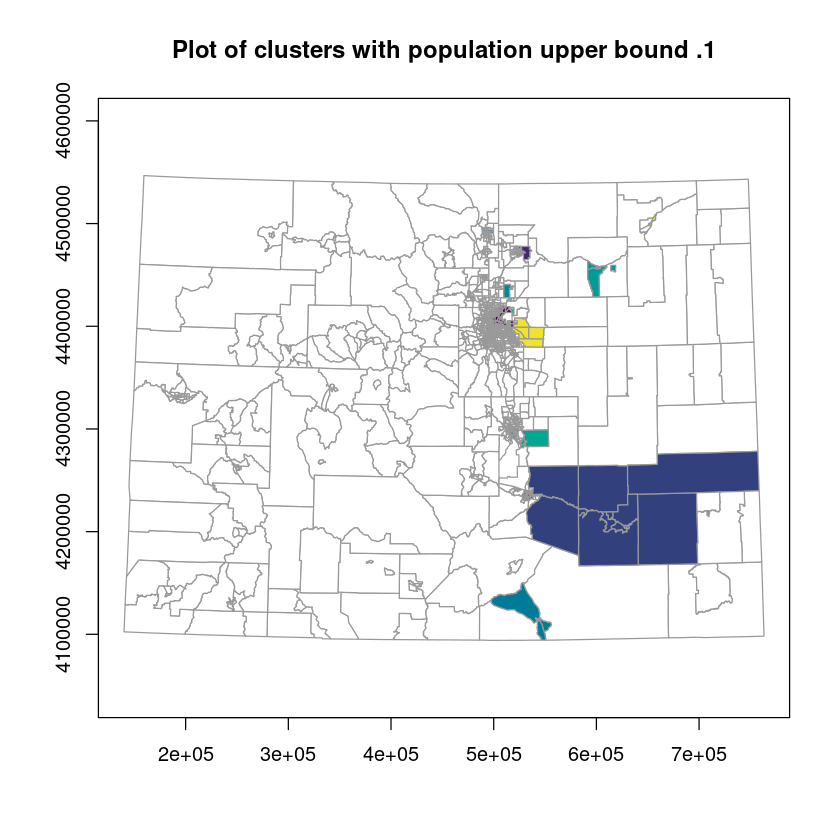

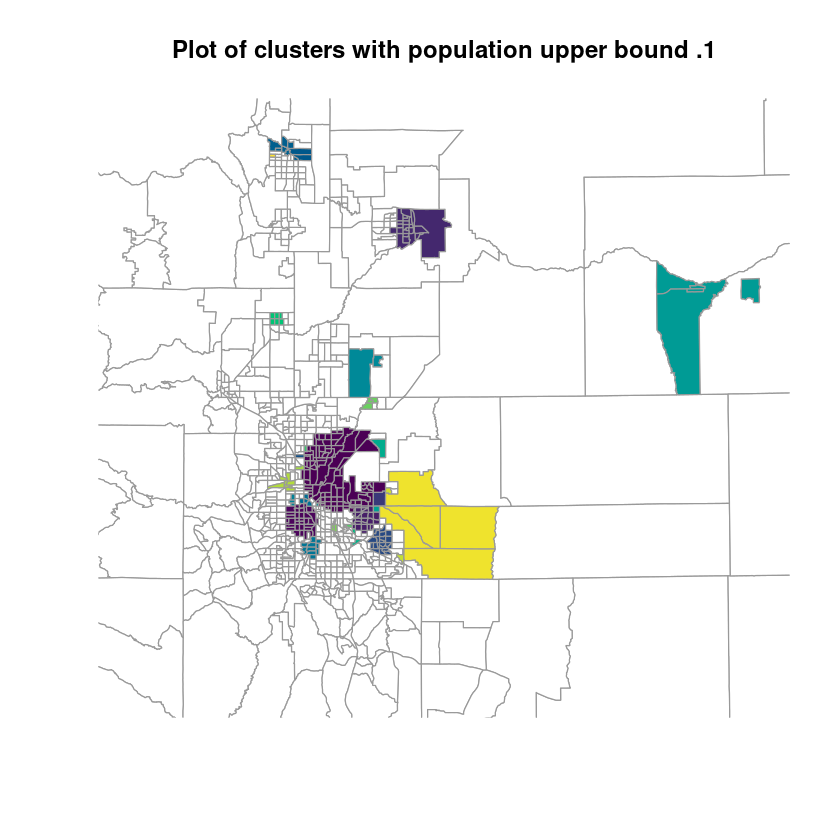

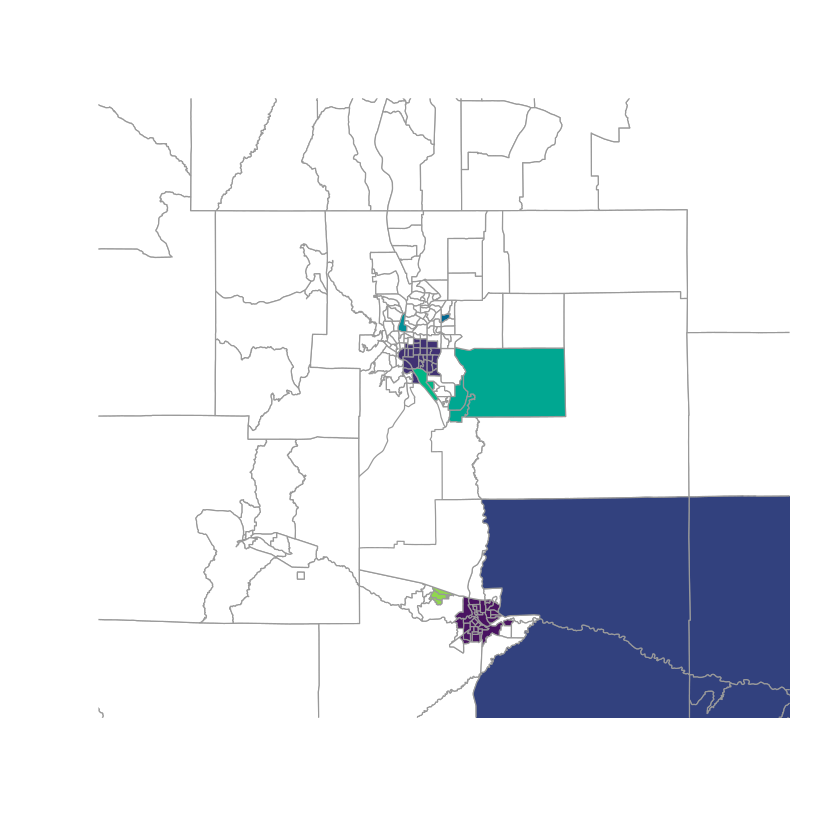

In [106]:
# need to color 26 clusters 
mycol = grDevices::hcl.colors(26) 

plot(newshape2$geometry.x, border="grey60", axes=TRUE, 
     col = color.clusters(scan_.5, col = mycol))  
title(main = "Plot of clusters with population upper bound .5") 
plot(newshape2$geometry.x, border = "grey60",  
     col = color.clusters(scan_.5, col = mycol), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
title(main = "Plot of clusters with population upper bound .5")
 

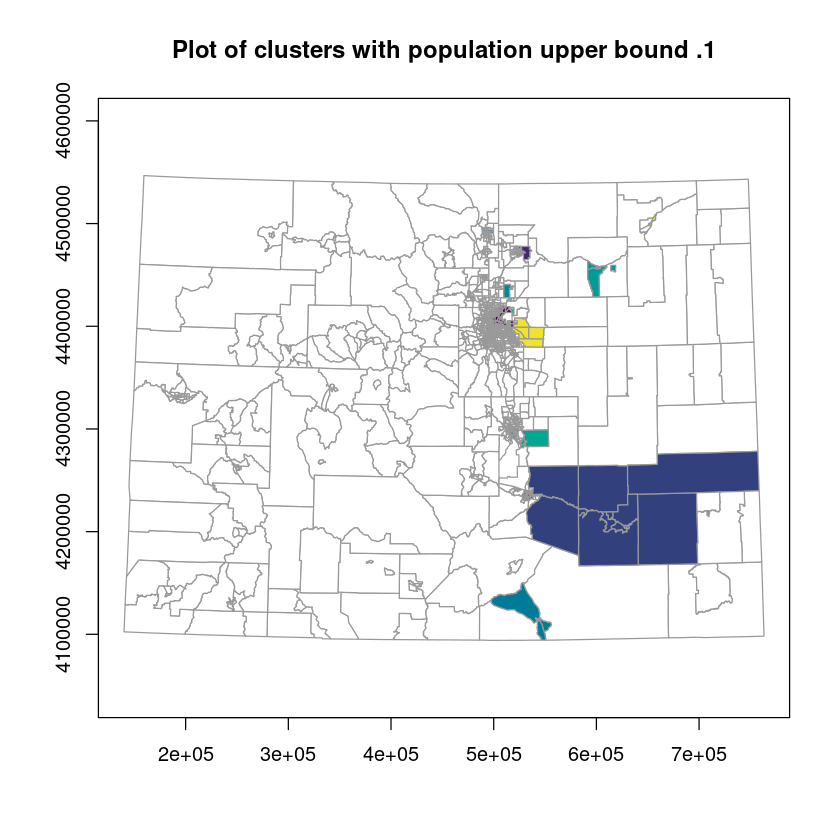

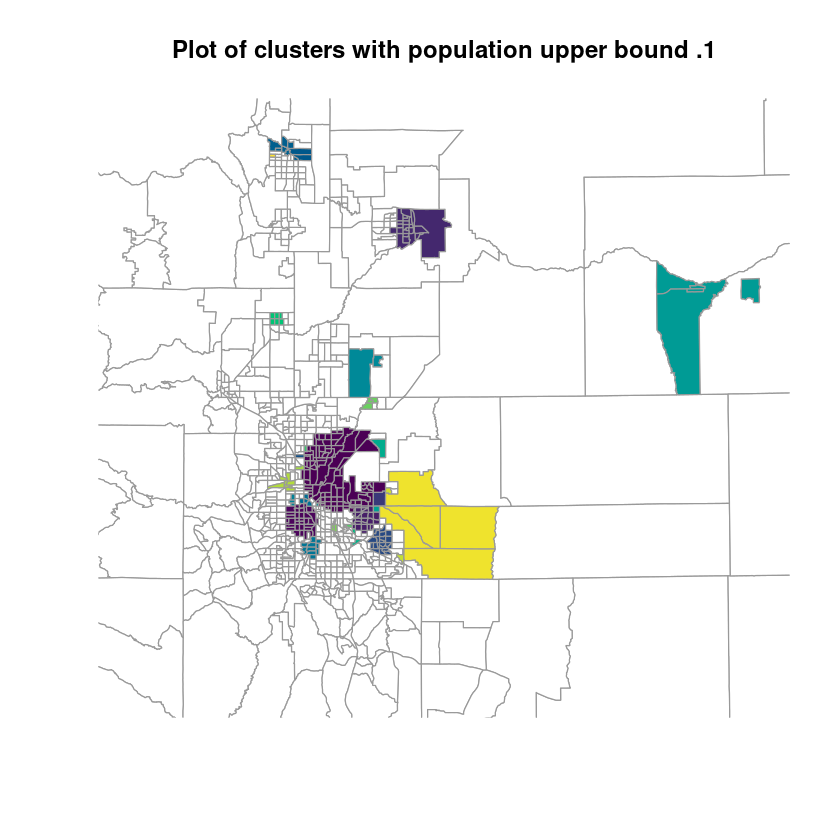

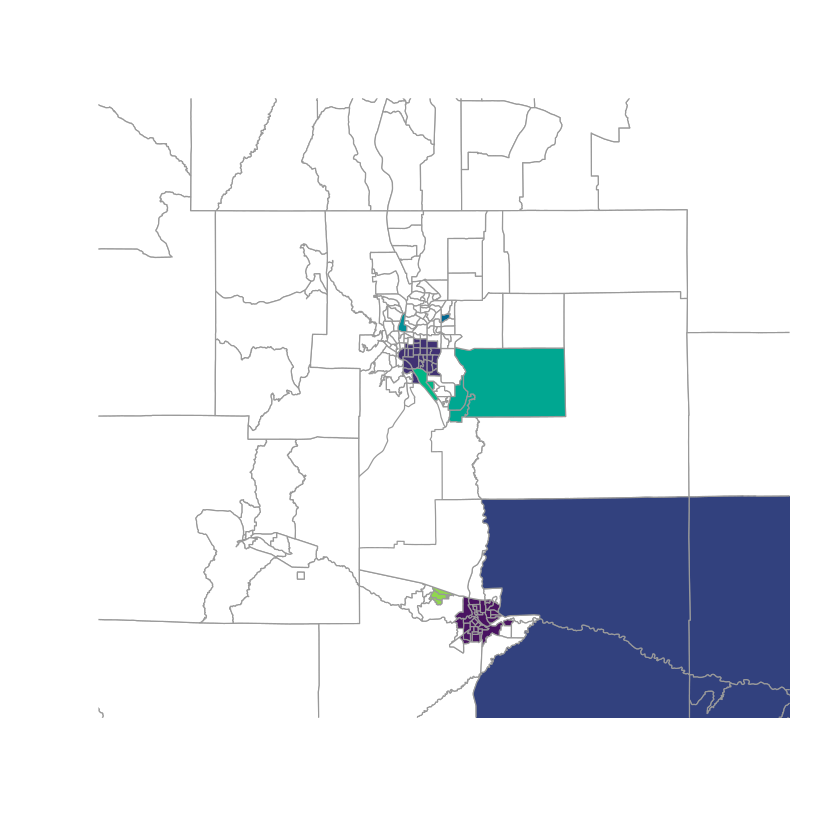

In [107]:
# need to color 41 clusters 
mycol = grDevices::hcl.colors(41) 
# color.clusters(scan, col = mycol) colors the 3 clusters using the desired clusters 
plot(newshape2$geometry.x, border="grey60", axes=TRUE, 
     col = color.clusters(scan_.1, col = mycol)) 
title(main = "Plot of clusters with population upper bound .1") 
plot(newshape2$geometry.x, border = "grey60",  
     col = color.clusters(scan_.1, col = mycol), xlim = range(450050:620000), ylim = c(4350000, 4500000)) 
title(main = "Plot of clusters with population upper bound .1")
plot(newshape2$geometry.x, border = "grey60", 
     col = color.clusters(scan_.1, col = mycol), xlim = range(450000:600000), ylim = c(4250000, 4320000)) 

## <br><br><br><br><br> Find and plot neighbor matrix

Warning message in st_point_on_surface.sf(newshape):
“st_point_on_surface assumes attributes are constant over geometries of x”


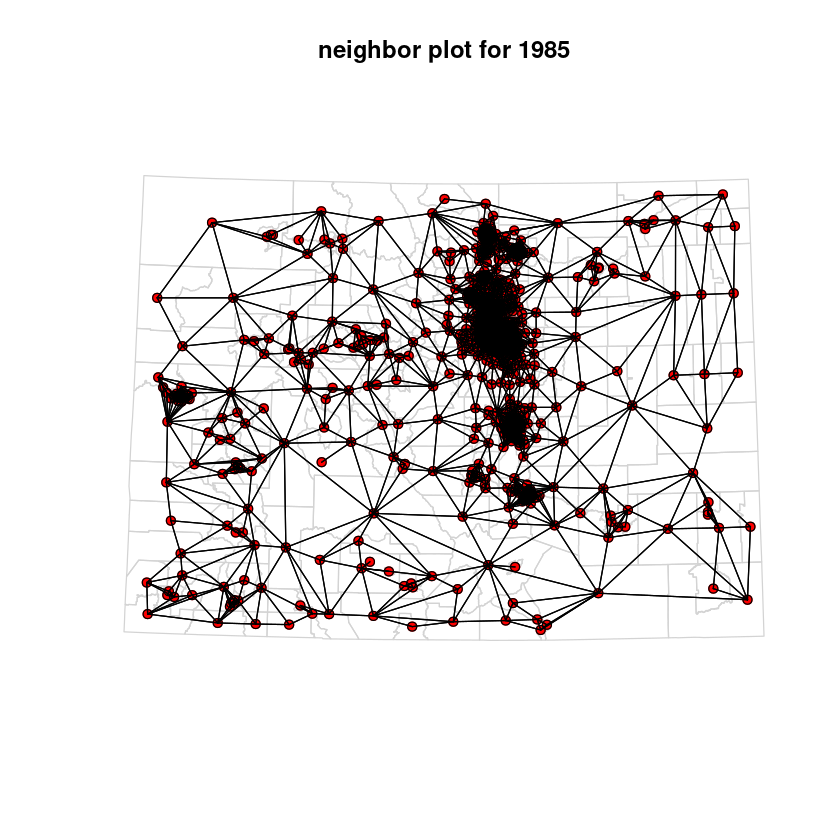

In [69]:
library(spdep)
nb_regions <- poly2nb(newshape2)
newshape <- sf::st_sf(diabetes_pop)
newshape <- st_transform(newshape, "+init=epsg:32613")
coords <- st_coordinates(st_point_on_surface(newshape))
# plot neighbor matrices for 85 and 89
plot(newshape2$geometry.x, border = "lightgrey")
points(newshape2$latitude, newshape2$longitude, col = 'red', pch = 19)
plot(nb_regions, coords, add = TRUE)
title("neighbor plot for Colorado census tracts")

## <br><br><br><br><br>CRH version of Moran's I

In [12]:
# constan't risk version of moran's i
y = cases # number of cases
N = length(y) # number of regions
n = population #population sizes
e = sum(y) / sum(n) * n # expected per region
# make a function for i_cr
i_cr = function(y, rni, W) {
y_std = matrix((y - rni)/sqrt(rni))
return(sum(W * y_std %*% t(y_std))/sum(W))
}
nsim = 499
tsimc = numeric(nsim)
w = nb2mat(nb_regions, style = "B")
t0c = i_cr(y, e, w) # observed statistic
# statistics for data simualted under CRH
for (i in 1:nsim) tsimc[i] = i_cr(rpois(N, e), rni = e, W = w)
# p-value
(sum(tsimc >= t0c) + 1)/(nsim + 1)

[1] 0.002

 ## <br><br><br><br><br>Tango's Index

In [57]:
load("/newhome/priceade/nc.rda")
suppressPackageStartupMessages(library(sf))
suppressPackageStartupMessages(library(smerc))
suppressPackageStartupMessages(library(spdep))

In [71]:
coords = as.matrix(cbind("east" = newshape2$longitude, "north" = newshape2$latitude))
cases = (newshape2$counts)
pop = newshape2$Population

# Find distance matrix
d = as.matrix(dist(coords))
ds <- apply(d, 1, sort)
range(ds[2,])

[1]   394.8603 55137.9355

<br><br><br><br><br> **f. The intercentroid distances for the North Carolina data are between 0.12 and 8.22 units. In the context of
Tango’s recommended weights matrix, a very weak spatial correlation has κ = 0.1 and a very strong spatial
correlation has κ = 7. Perform Monte Carlo tests using using Tango’s index with Tango’s recommended
weights with both κ = 0.1 and κ = 7 for the SID74 variable with 499 simulated data sets. For the centroid
coordinates, use the east and north columns of nc.sids. Interpret your results in the context of the problem.**<br><br>

In [74]:
coords = as.matrix(cbind("east" = newshape2$longitude, "north" = newshape2$latitude))
cases = (newshape2$counts)
pop = newshape2$Population

##################################################
# Exponential decay weight matrix
# use different kappas in defining weights
w.1  <- dweights(coords, kappa = 394.9)
w7  <- dweights(coords, kappa = 55137.9)
(tango_394.9 <-  tango.test(cases, pop, w.1, nsim = 499))
(tango_55137.9  <- tango.test(cases, pop, w7, nsim = 499))


method: Tango's index

index: 4e-04

goodness-of-fit component: 0.00038

spatial autocorrelation component: 2.1e-05

chi-square statistic: 26000

chi-square df: 730

chi-square p-value: 0

Monte Carlo p-value: 0.002

method: Tango's index

index: 0.0041

goodness-of-fit component: 0.00038

spatial autocorrelation component: 0.0037

chi-square statistic: 2800

chi-square df: 2.9

chi-square p-value: 0

Monte Carlo p-value: 0.002



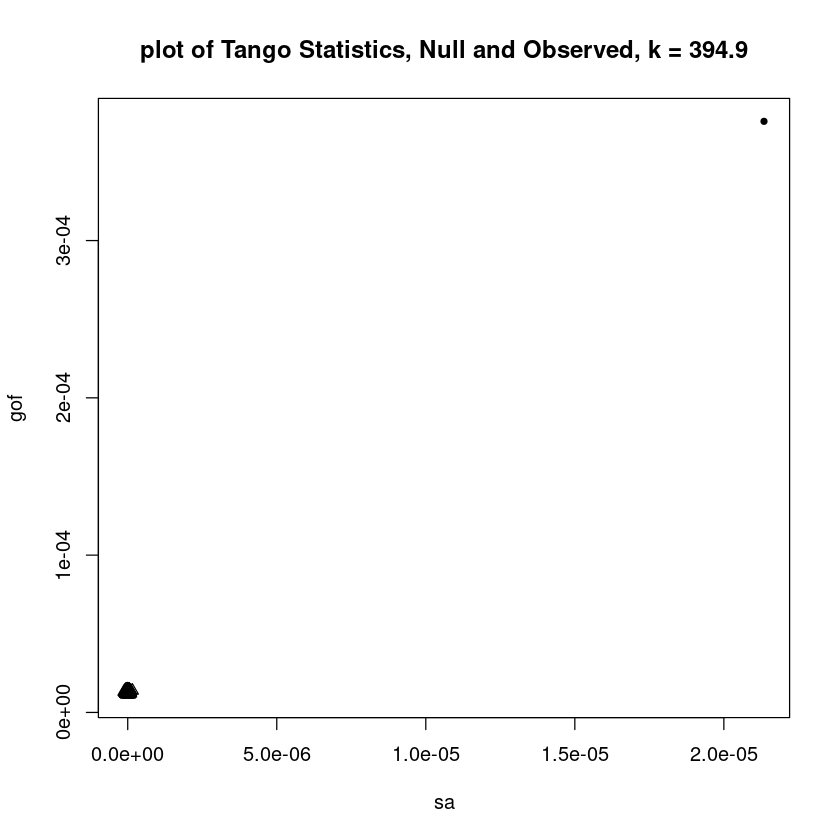

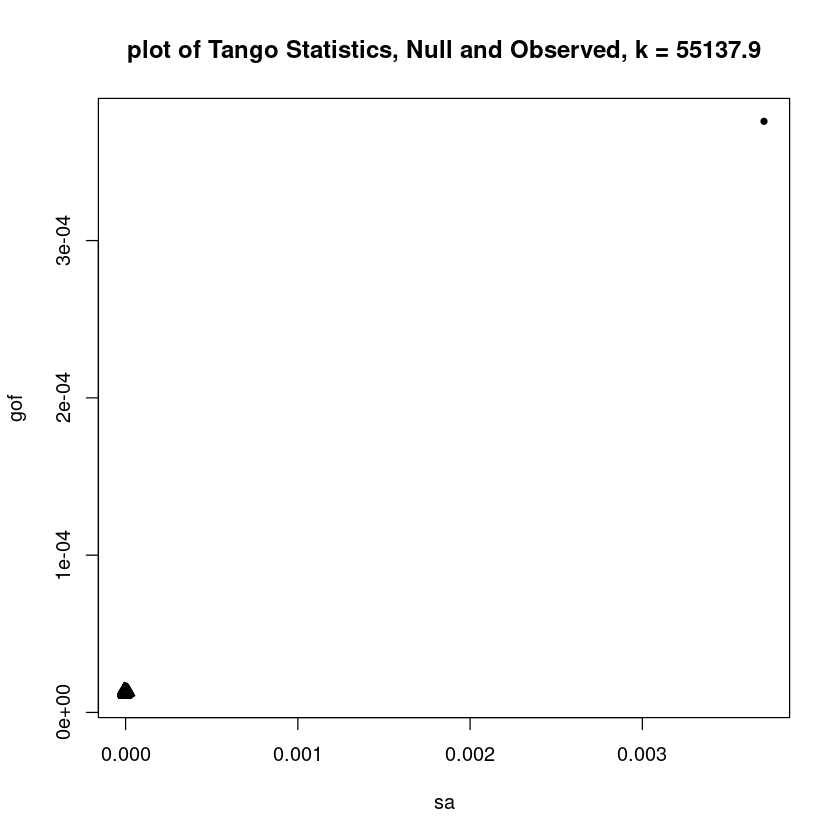

In [76]:
gof <- c(tango_394.9$gof,tango_394.9$gof)
sa <- c(tango_55137.9$sa,tango_55137.9$sa)

plot(tango_394.9)
title(main = "plot of Tango Statistics, Null and Observed, k = 394.9")
plot(tango_55137.9)
title(main = "plot of Tango Statistics, Null and Observed, k = 55137.9")


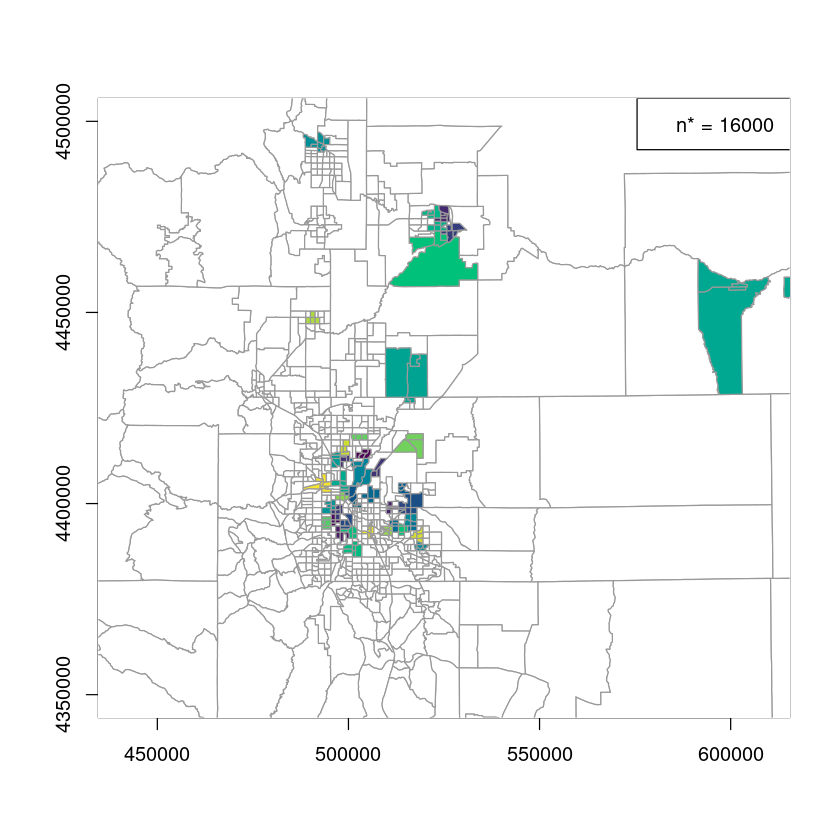

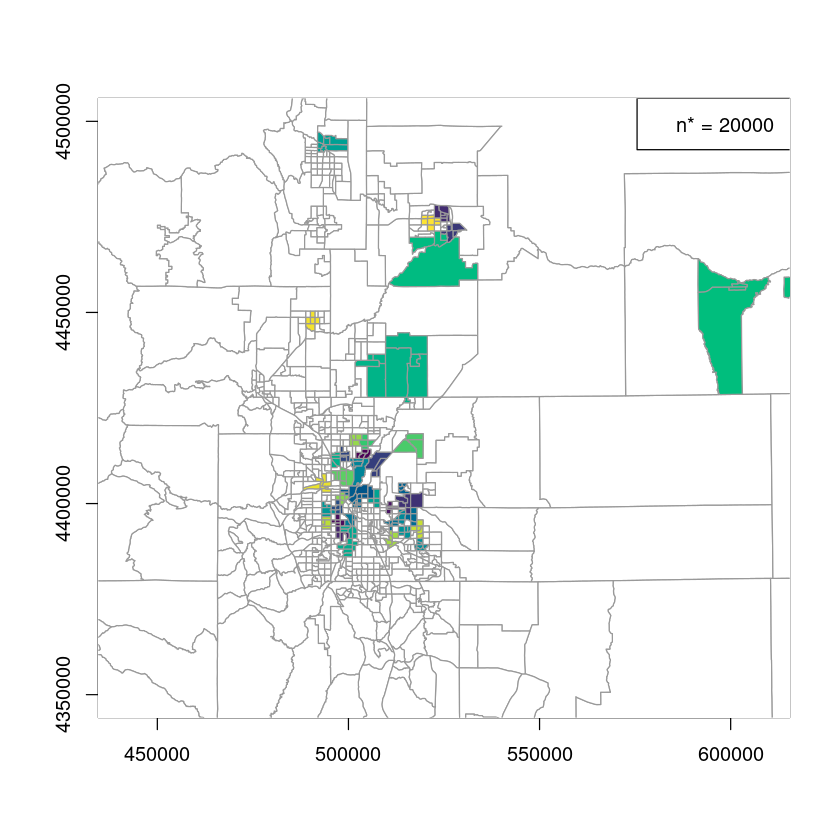

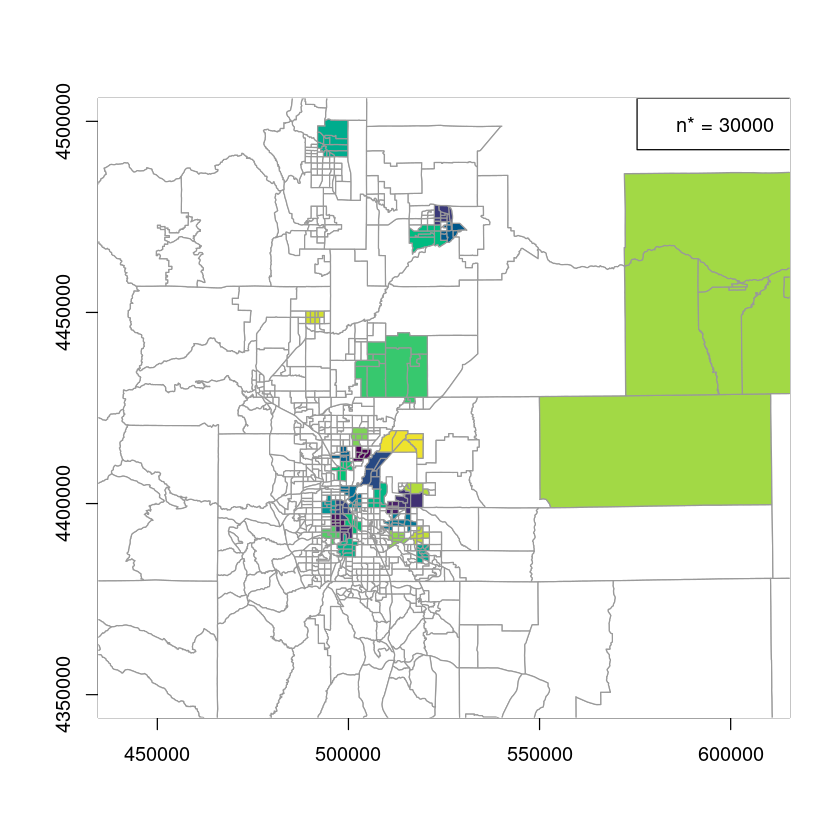

In [93]:
plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp16000), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
legend("topright", legend = c("n* = 16000")) 
plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp20000), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
legend("topright", legend = c("n* = 20000")) 
plot(newshape2$geometry.x, border = "grey60", axes = TRUE, 
     col = color.clusters(cepp30000), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
legend("topright", legend = c("n* = 30000")) 


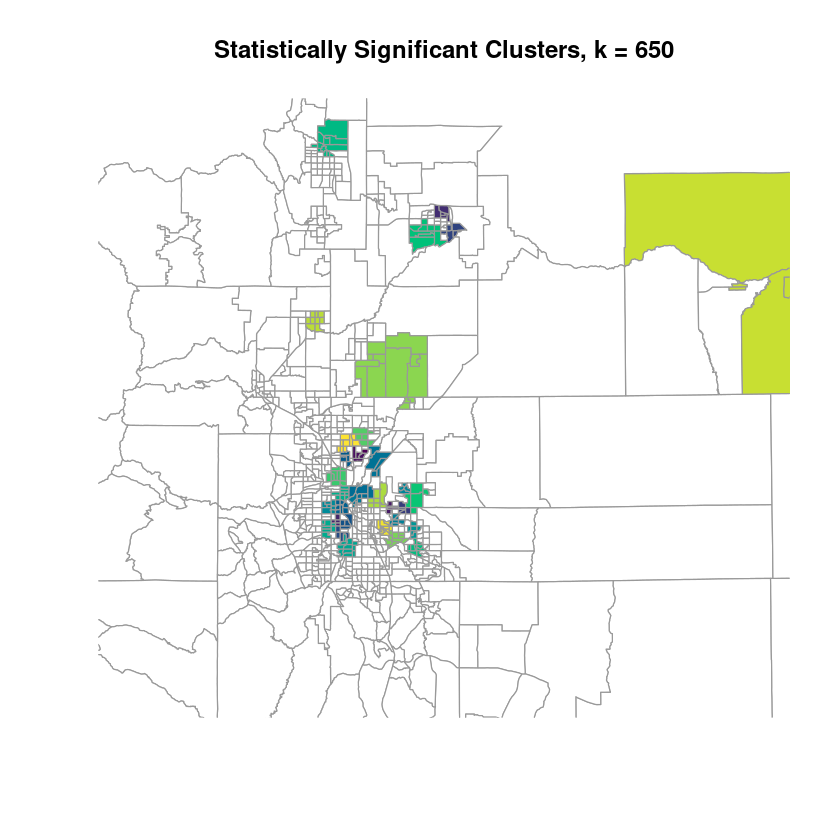

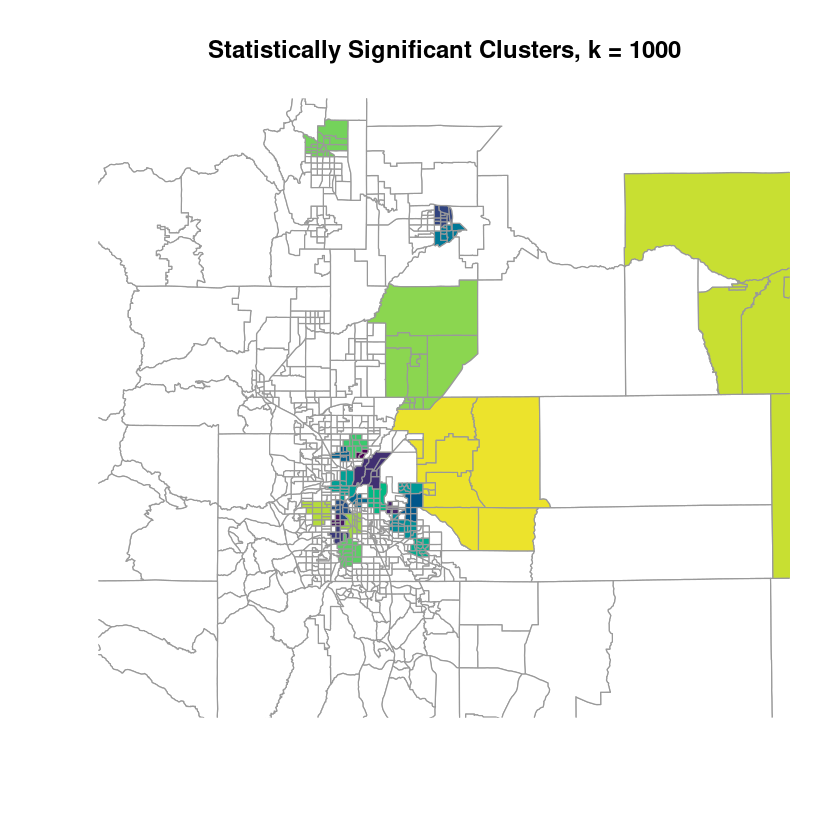

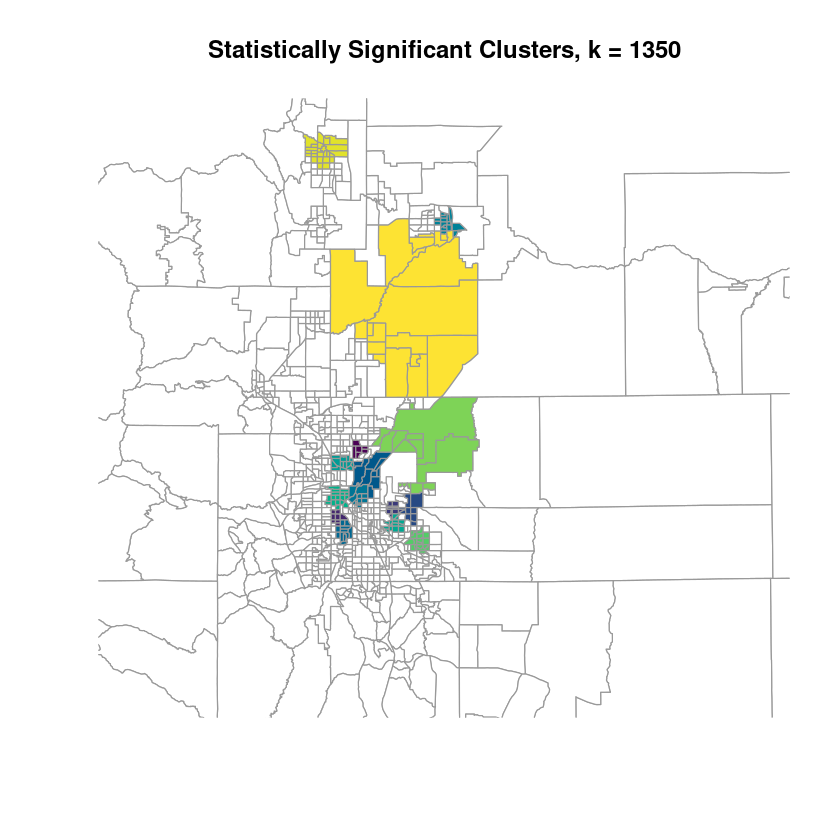

In [94]:
plot(newshape2$geometry.x, border = "grey60",  
     col = color.clusters(bn650), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
title(main = "Statistically Significant Clusters, k = 650")
plot(newshape2$geometry.x, border = "grey60",  
     col = color.clusters(bn1000), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
title(main = "Statistically Significant Clusters, k = 1000")
plot(newshape2$geometry.x, border = "grey60",  
     col = color.clusters(bn1350), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
title(main = "Statistically Significant Clusters, k = 1350")

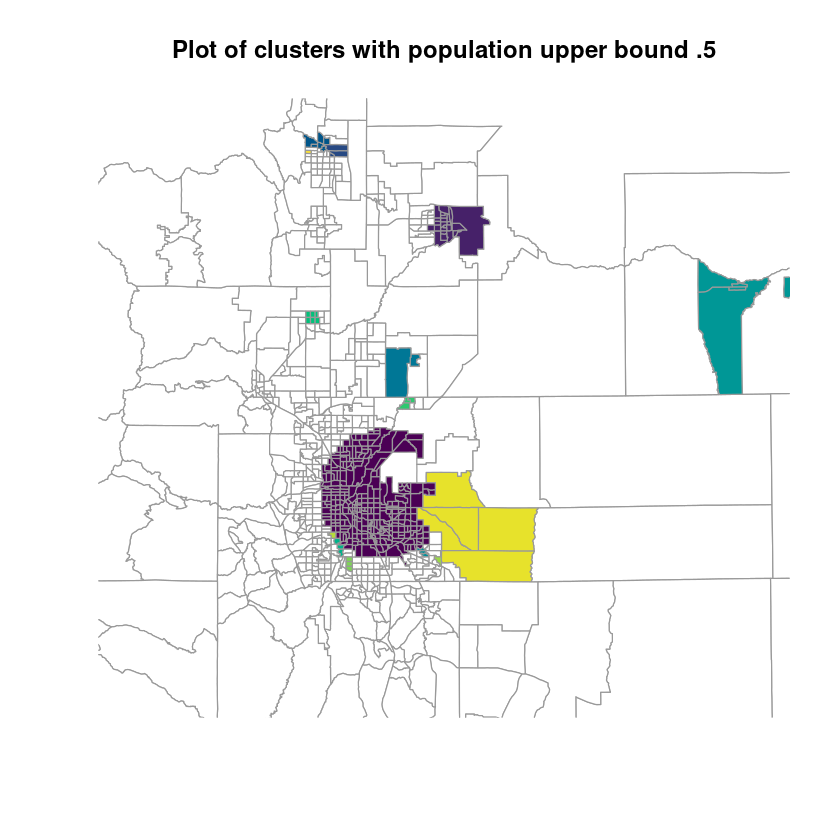

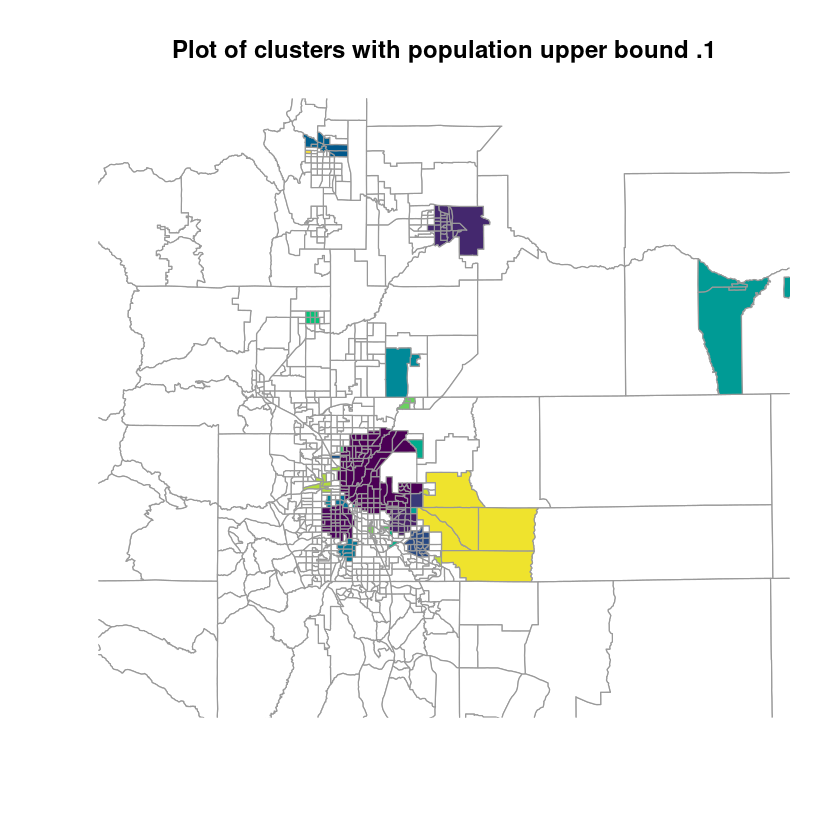

In [92]:
mycol = grDevices::hcl.colors(26)
plot(newshape2$geometry.x, border = "grey60",  
     col = color.clusters(scan_.5, col = mycol), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
title(main = "Plot of clusters with population upper bound .5")
mycol = grDevices::hcl.colors(41) 
plot(newshape2$geometry.x, border = "grey60",  
     col = color.clusters(scan_.1, col = mycol), xlim = range(450000:600000), ylim = c(4350000, 4500000)) 
title(main = "Plot of clusters with population upper bound .1")